/scratch/42721007/ipykernel_248362/2858799193.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(150, min_periods=1, center=True, win_type='gaussian').mean(std=50))


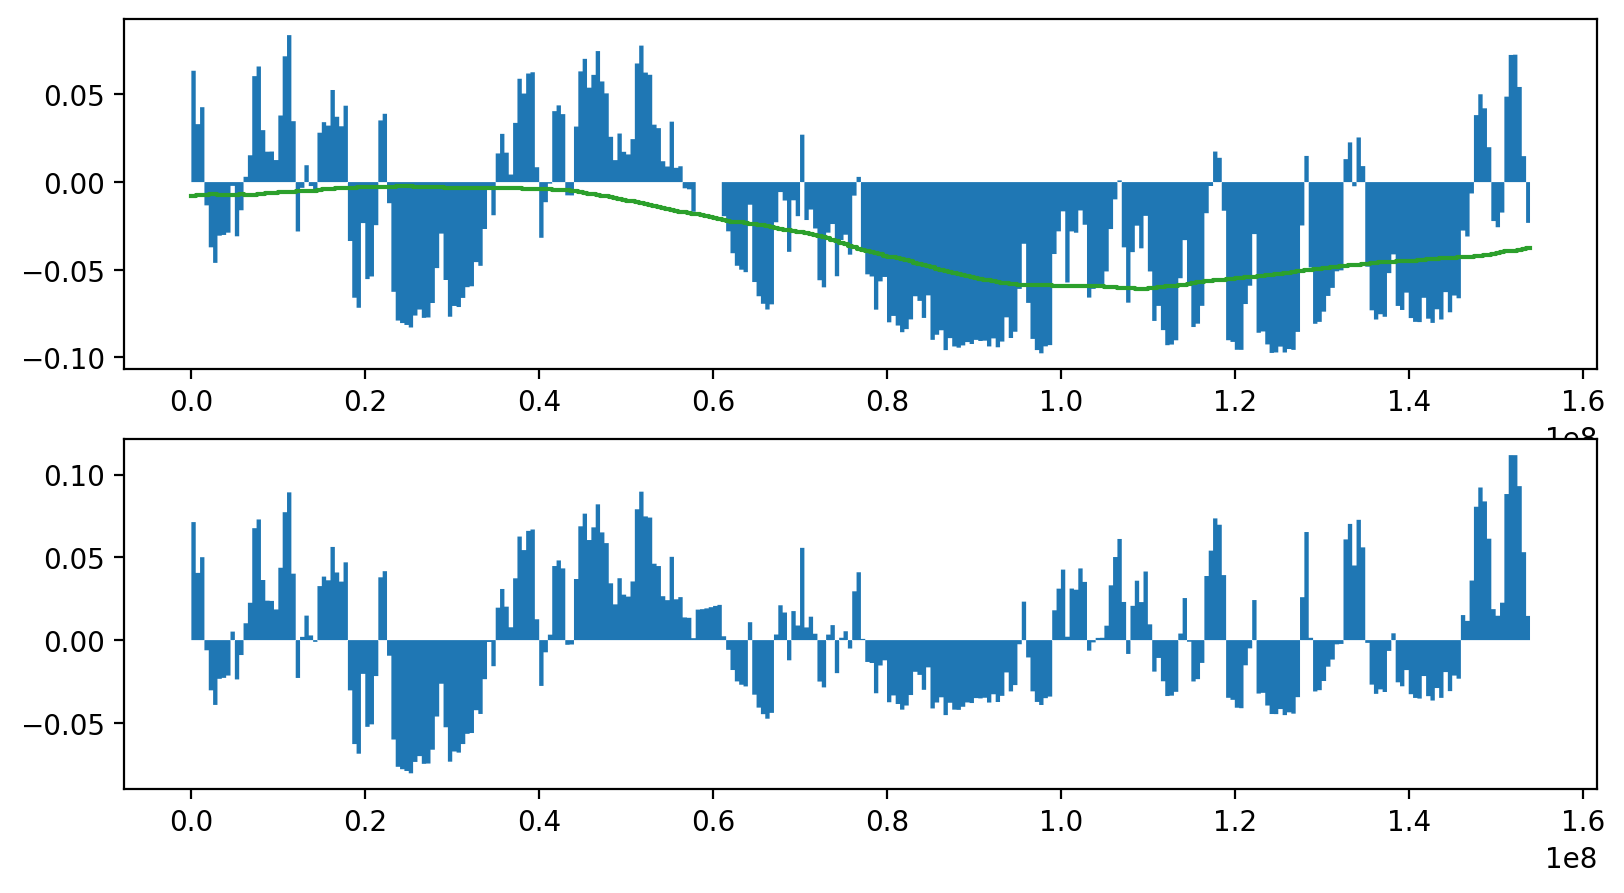

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from horizonplot import horizonplot
%config InlineBackend.figure_format = 'retina'

from scipy.signal.windows import triang, gaussian

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

df = pd.read_csv('aurora/rs_rep11_macaca_500_correct.normToOne_compartments.txt',
                         sep='\t', header=None, names=['chrom', 'start', 'end', 'compartment', 'val', '_'])
ab_data = df.loc[df.chrom == 'chrX']
ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(150, min_periods=1, center=True, win_type='gaussian').mean(std=50))

ab_data = stairs(ab_data)
fig, ax = plt.subplots(2, 1, figsize=(9.5, 5))
ax[0].fill_between(ab_data.pos, ab_data.val)
ax[0].plot(ab_data.pos, ab_data.roll_mean, color='C2')
ax[1].fill_between(ab_data.pos, ab_data.val - ab_data.roll_mean)
ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(150, min_periods=1, center=True, win_type='gaussian').mean(std=20))

ab_data = stairs(ab_data)

/scratch/42721007/ipykernel_248362/2489817184.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_data['roll_mean_trian'] = ab_data.val.transform(lambda x: x.rolling(120, min_periods=1, center=True, win_type='triang').mean())
/scratch/42721007/ipykernel_248362/2489817184.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_data['roll_mean_gauss'] = ab_data.val.transform(lambda x: x.rolling(100, min_periods=1, center=True, win_type='gaussian').mean(std=25))
/scratch/42721007/ipykernel_248362/248981718

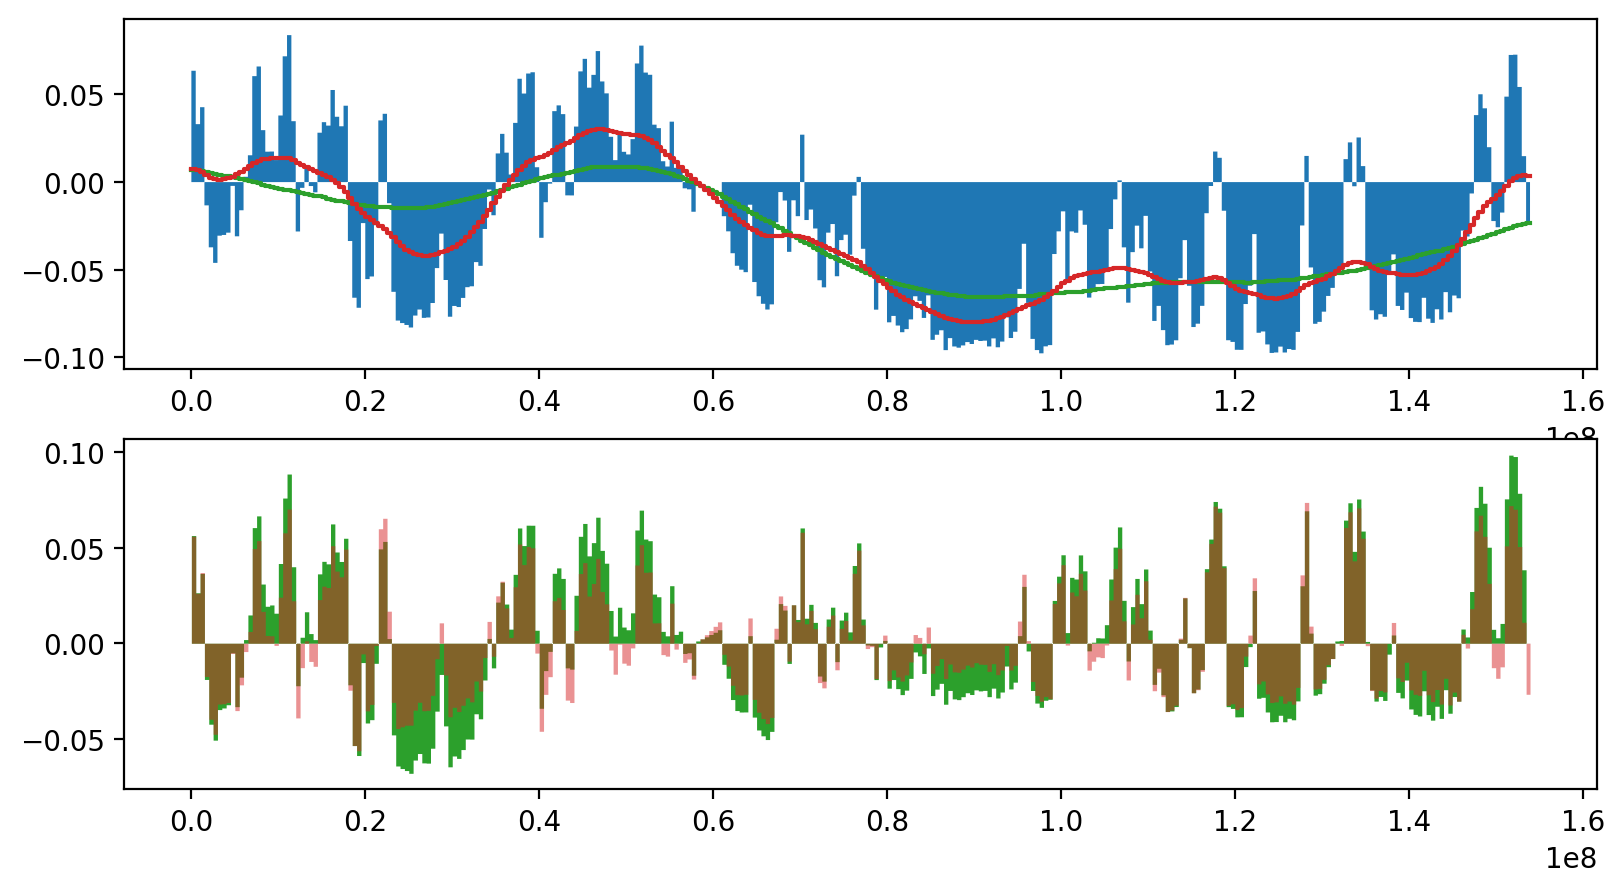

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

from scipy.signal.windows import triang, gaussian

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

df = pd.read_csv('aurora/rs_rep11_macaca_500_correct.normToOne_compartments.txt',
                         sep='\t', header=None, names=['chrom', 'start', 'end', 'compartment', 'val', '_'])
ab_data = df.loc[df.chrom == 'chrX']

# ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(80, 1, center=True).mean())
ab_data['roll_mean_trian'] = ab_data.val.transform(lambda x: x.rolling(120, min_periods=1, center=True, win_type='triang').mean())
ab_data['roll_mean_gauss'] = ab_data.val.transform(lambda x: x.rolling(100, min_periods=1, center=True, win_type='gaussian').mean(std=25))
ab_data['roll_mean_exp'] = ab_data.val.transform(lambda x: x.rolling(100, min_periods=1, center=True, win_type='exponential').mean(tau=10))
ab_data = stairs(ab_data)
fig, ax = plt.subplots(2, 1, figsize=(9.5, 5))
ax[0].fill_between(ab_data.pos, ab_data.val)
ax[0].plot(ab_data.pos, ab_data.roll_mean_gauss, color='C2')
ax[0].plot(ab_data.pos, ab_data.roll_mean_exp, color='C3')
ax[1].fill_between(ab_data.pos, ab_data.val - ab_data.roll_mean_gauss, color='C2', linewidth=0)
ax[1].fill_between(ab_data.pos, ab_data.val - ab_data.roll_mean_exp, color='C3', linewidth=0, alpha=0.5)

In [3]:
ab_data['val_corr'] = ab_data.val - ab_data.roll_mean_exp
ab_data.loc[ab_data.val_corr > 0, 'compartment'] = 'A'
ab_data.loc[ab_data.val_corr <= 0, 'compartment'] = 'B'

In [4]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# %config InlineBackend.figure_format = 'retina'

# from scipy.signal.windows import triang, gaussian

# def stairs(df, start='start', end='end', pos='pos', endtrim=0):
#     "Turn a df with start, end into one with pos to plot as stairs"
#     df1 = df.copy(deep=True)
#     df2 = df.copy(deep=True)
#     df1[pos] = df1[start]
#     df2[pos] = df2[end] - endtrim
#     return pd.concat([df1, df2]).sort_values([start, end])

# df = pd.read_csv('aurora/rs_rep11_macaca_500_correct.normToOne_compartments.txt',
#                          sep='\t', header=None, names=['chrom', 'start', 'end', 'compartment', 'val', '_'])
# ab_data = df.loc[df.chrom == 'chrX']
# ab_data = stairs(ab_data)
# # ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(80, 1, center=True).mean())
# # ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(120, min_periods=1, center=True, win_type='triang').mean())
# ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(100, min_periods=1, center=True, win_type='gaussian').mean(std=25))

# fig, ax = plt.subplots(2, 1, figsize=(9.5, 5))
# ax[0].fill_between(ab_data.pos, ab_data.val)
# ax[0].plot(ab_data.pos, ab_data.roll_mean, color='C2')
# ax[1].fill_between(ab_data.pos, ab_data.val - ab_data.roll_mean)


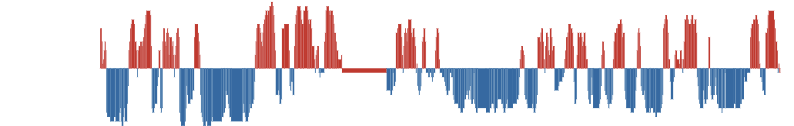

In [5]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.signal.windows import triang

# def stairs(df, start='start', end='end', pos='pos', endtrim=0):
#     "Turn a df with start, end into one with pos to plot as stairs"
#     df1 = df.copy(deep=True)
#     df2 = df.copy(deep=True)
#     df1[pos] = df1[start]
#     df2[pos] = df2[end] - endtrim
#     return pd.concat([df1, df2]).sort_values([start, end])

# df = pd.read_csv('aurora/rs_rep11_macaca_500_correct.normToOne_compartments.txt',
#                          sep='\t', header=None, names=['chrom', 'start', 'end', 'compartment', 'val', '_'])
# ab_data = df.loc[df.chrom == 'chrX']
# ab_data = stairs(ab_data)
# ab_data['roll_mean'] = ab_data.val.transform(lambda x: x.rolling(200, 1, center=True, win_type='triang').mean())

# fig, ax = plt.subplots(2, 1, figsize=(9.5, 5))
# ax[0].fill_between(ab_data.pos, ab_data.val)
# ax[0].plot(ab_data.pos, ab_data.roll_mean, color='C1')
# ax[1].fill_between(ab_data.pos, ab_data.val - ab_data.roll_mean)

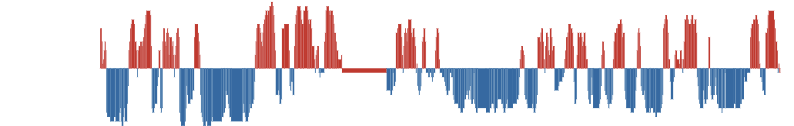

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from horizonplot import horizonplot
%config InlineBackend.figure_format = 'retina'

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

## RS A/B regions

In [7]:
# df = pd.read_csv('aurora/rs_rep11_macaca_500_correct.normToOne_compartments.txt',
#                          sep='\t', header=None, names=['chrom', 'start', 'end', 'compartment', 'val', '_'])
# ab_data = df.loc[df.chrom == 'chrX'].drop(columns=['val', '_'])
# ab_data['end'] = ab_data['end'] + 1 # to make them end exclusive
# ab_data.head()

In [8]:
ab_data['y'] = 1
ab_data.loc[ab_data.compartment == 'B', 'y'] = -1
ab_data = stairs(ab_data)
ab_data

chrom      start        end compartment       val  _  roll_mean_trian  \
5423  chrX          1     500000           A  0.063476  .         0.004028   
5423  chrX          1     500000           A  0.063476  .         0.004028   
5423  chrX          1     500000           A  0.063476  .         0.004028   
5423  chrX          1     500000           A  0.063476  .         0.004028   
5424  chrX     500001    1000000           A  0.033038  .         0.003495   
...    ...        ...        ...         ...       ... ..              ...   
5729  chrX  153000001  153500000           A  0.014798  .        -0.025513   
5730  chrX  153500001  153950000           B -0.023243  .        -0.024978   
5730  chrX  153500001  153950000           B -0.023243  .        -0.024978   
5730  chrX  153500001  153950000           B -0.023243  .        -0.024978   
5730  chrX  153500001  153950000           B -0.023243  .        -0.024978   

      roll_mean_gauss  roll_mean_exp        pos  val_corr  y  
5423         0.007103       0.007466          1  0.056010  1  
5423         0.007103       0.007466          1  0.056010  1  
5423         0.007103       0.007466     500000  0.056010  1  
5423         0.007103       0.007466     500000  0.056010  1  
5424         0.006622       0.006892     500001  0.026146  1  
...               ...            ...        ...       ... ..  
5729        -0.023660       0.003824  153500000  0.010974  1  
5730        -0.023219       0.003479  153500001 -0.026722 -1  
5730        -0.023219       0.003479  153500001 -0.026722 -1  
5730        -0.023219       0.003479  153950000 -0.026722 -1  
5730        -0.023219       0.003479  153950000 -0.026722 -1  

[1232 rows x 12 columns]

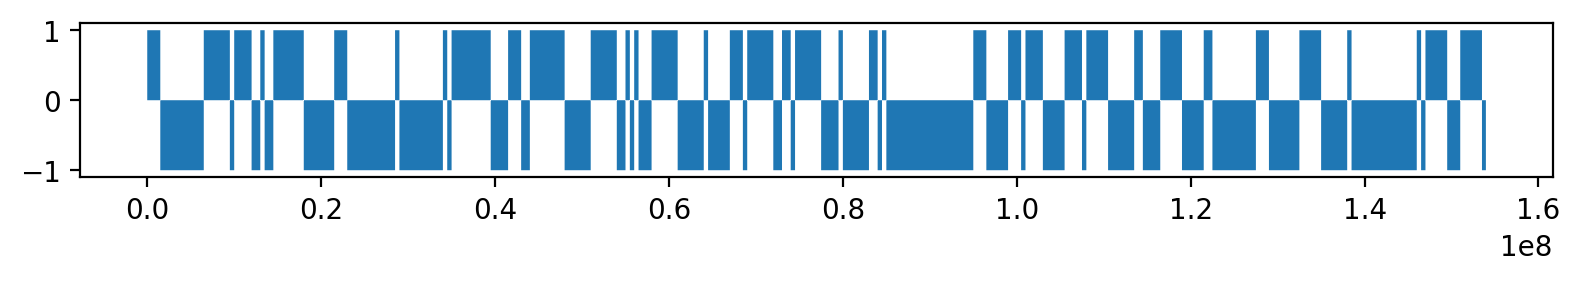

In [9]:
plt.figure(figsize=(9.5, 1))
plt.fill_between(ab_data.pos, ab_data.y) ; 

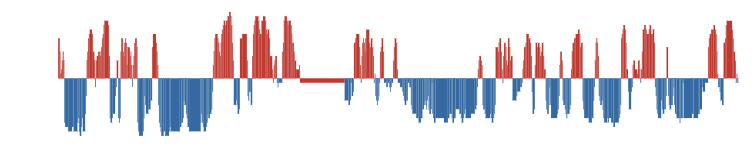

In [10]:
ab_data['region_label'] = (ab_data.compartment.shift() != ab_data.compartment).cumsum()

ab_regions = (ab_data
                 .groupby(['chrom', 'region_label', 'compartment'])
                 .agg({'start':'min', 'end':'max'})
                 .reset_index(level=['chrom', 'compartment'])
                )
ab_regions['transition_region_start'] = ab_regions.end - 1
ab_regions['transition_region_end'] = ab_regions.end + 1

ab_regions[['chrom', 'transition_region_start', 'transition_region_end']].to_csv('ab_transitions.bed', sep='\t', header=False, index=False)
ab_regions.head()

chrom compartment     start       end  transition_region_start  \
region_label                                                                  
1             chrX           A         1   1500000                  1499999   
2             chrX           B   1500001   6500000                  6499999   
3             chrX           A   6500001   9500000                  9499999   
4             chrX           B   9500001  10000000                  9999999   
5             chrX           A  10000001  12000000                 11999999   

              transition_region_end  
region_label                         
1                           1500001  
2                           6500001  
3                           9500001  
4                          10000001  
5                          12000001

In [11]:
#! liftOver -minMatch=0.9 -multiple -minSizeQ=10000 ab_transitions.bed rheMac10ToPapAnu2.over.chain.gz mapped.bed unmapped.bed

! liftOver -minMatch=0.95 ab_transitions.bed rheMac10ToPapAnu2.over.chain.gz mapped_to_PapAnu2.bed unmapped_to_PapAnu2.bed
! liftOver -minMatch=0.95 mapped_to_PapAnu2.bed papAnu2ToPapAnu4.over.chain.gz mapped_to_PapAnu4.bed unmapped_to_PapAnu2.bed

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


In [12]:
! wc -l ab_transitions.bed
! wc -l mapped_to_PapAnu2.bed
# ! cat mapped_to_PapAnu2.bed
# ! cat mapped_to_PapAnu4.bed

74 ab_transitions.bed
62 mapped_to_PapAnu2.bed


In [13]:
ab_transitions_mapped = pd.read_csv('mapped_to_PapAnu4.bed', sep='\t', names=['chrom', 'start', 'end'])
ab_transitions_mapped = ab_transitions_mapped.loc[ab_transitions_mapped.chrom == 'chrX']
ab_transitions_mapped['length'] = ab_transitions_mapped.end - ab_transitions_mapped.start
ab_transitions_mapped['approx_pos'] = (ab_transitions_mapped.start + ab_transitions_mapped.end) / 2
ab_transitions_mapped.head()

chrom     start       end  length  approx_pos
1  chrX   4264278   4264280       2   4264279.0
2  chrX   7194125   7194127       2   7194126.0
3  chrX   7694435   7694437       2   7694436.0
4  chrX   9684248   9684250       2   9684249.0
5  chrX  10692614  10692616       2  10692615.0

## RS TADs

In [14]:
df = pd.read_csv('aurora/tads_rs_macaca.bed',
                sep='\t', header=None, names=['chrom', 'start', 'end', 'a', 'b'])
tad_regions = df.loc[df.chrom == 'X'].drop(columns=['a', 'b']).reset_index(drop=True)
tad_regions['end'] = tad_regions['end'] + 1 # to make them end exclusive
tad_regions['chrom'] = 'chr' + tad_regions.chrom
tad_regions.head()

chrom     start       end
0  chrX         0   1500001
1  chrX   1500000   5500001
2  chrX   5500000  11500001
3  chrX  11500000  14500001
4  chrX  14500000  18000001

In [15]:
tad_regions['transition_region_start'] = tad_regions.end - 50_000
tad_regions['transition_region_end'] = tad_regions.end + 50_000

tad_regions[['chrom', 'transition_region_start', 'transition_region_end']].to_csv('tad_transitions.bed', sep='\t', header=False, index=False)
tad_regions.head()

chrom     start       end  transition_region_start  transition_region_end
0  chrX         0   1500001                  1450001                1550001
1  chrX   1500000   5500001                  5450001                5550001
2  chrX   5500000  11500001                 11450001               11550001
3  chrX  11500000  14500001                 14450001               14550001
4  chrX  14500000  18000001                 17950001               18050001

In [16]:
! wc -l tad_transitions.bed

17 tad_transitions.bed


In [17]:
#! liftOver -minMatch=0.9 -multiple -minSizeQ=10000 tad_transitions.bed rheMac10ToPapAnu2.over.chain.gz mapped.bed unmapped.bed

! liftOver -minMatch=0.80 tad_transitions.bed rheMac10ToPapAnu2.over.chain.gz mapped_to_PapAnu2.bed unmapped_to_PapAnu2.bed
! liftOver -minMatch=0.95 mapped_to_PapAnu2.bed papAnu2ToPapAnu4.over.chain.gz mapped_to_PapAnu4.bed unmapped_to_PapAnu2.bed

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


In [18]:
! wc -l mapped_to_PapAnu2.bed

14 mapped_to_PapAnu2.bed


In [19]:
! wc -l unmapped_to_PapAnu2.bed

0 unmapped_to_PapAnu2.bed


In [20]:
! wc -l mapped_to_PapAnu4.bed

14 mapped_to_PapAnu4.bed


In [21]:
tad_transitions_mapped = pd.read_csv('mapped_to_PapAnu4.bed', sep='\t', names=['chrom', 'start', 'end'])
tad_transitions_mapped = tad_transitions_mapped.loc[tad_transitions_mapped.chrom == 'chrX']
tad_transitions_mapped['length'] = tad_transitions_mapped.end - tad_transitions_mapped.start
tad_transitions_mapped['approx_pos'] = (tad_transitions_mapped.start + tad_transitions_mapped.end) / 2
tad_transitions_mapped.head()

chrom     start       end  length  approx_pos
0  chrX   3195029   3295056  100027   3245042.5
1  chrX   9122862   9228638  105776   9175750.0
2  chrX  12132328  12237574  105246  12184951.0
3  chrX  15511697  15598797   87100  15555247.0
4  chrX  57165835  57264701   98866  57215268.0

In [22]:
def length_to_windows(length_df, pops, window_size=100000):
    #pops = sorted(length_df["reference"].unique())
    window_l = list(range(length_df.pos.values[0], length_df.end_pos.values[-1], window_size))
    overall_dict = {"windows": window_l}
    for p in pops:
        overall_dict[p] = np.zeros(len(window_l))
    for i in range(len(window_l)):
        w = window_l[i]
        # Finding all paintings that start in this window.
        s_df = length_df.loc[(length_df.pos >= w) & (length_df.pos < w+window_size)]
        for index, row in s_df.iterrows():
            # x decides how many windows it should go beyond the current.
            # if x==0, it both starts and ends in the same window
            x = (row.pos-w+row.length)//window_size
            if x == 0:
                overall_dict[row["reference"]][i] += int(row.length)
            # Otherwise, the current window is filled from row.pos to window end
            else:
                overall_dict[row["reference"]][i] += int((w+window_size)-row.pos)
                # Then iterated for each full window (which is all windows < x)
                for s in range(x-1):
                    overall_dict[row["reference"]][i+1+s] += int(window_size)
                # Then finally added the ending window
                # print(row.paint_length+row.pos, (w+x*window_size), x, w)
                overall_dict[row["reference"]][i+x] += int(row.length+row.pos-(w+x*window_size))
    df = pd.DataFrame(overall_dict)
    return df

def create_paint_df_ind(df, ind, mapping, ns_map):
    d = {}
    d["pos"] = df.spos
    d["end_pos"] = df.epos -1
    d["length"] = df.epos - df.spos
    d["reference"] = df[ind].map(mapping)
    d["n/s"] = d["reference"].map(ns_map)
    d["individual"] = ind[:-2]
    d["haplotype"] = ind[-1:]
    return pd.DataFrame(d)

In [80]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering_sci.txt", sep =" ")

meta_data_abr = meta_data_samples.loc[:, ~meta_data_samples.columns.isin(['longitude', 'latitude',
                                                                          'callset_index'])]


In [88]:
meta_data_samples.head()

PGDP_ID    Provider_ID                      Provider  Genus  \
0  Sci_16066     16066_3130                        Rogers  Papio   
1  Sci_16098     16098_5026                        Rogers  Papio   
2  Sci_30877     30877_3426                    James Else  Papio   
3  Sci_30977     30977_3373                    James Else  Papio   
4  Sci_34449  34449_BZ11022  Rogers/Jolly/Phillips-Conroy  Papio   

        Species            Origin Sex  \
0  cynocephalus  Mikumi, Tanzania   F   
1  cynocephalus  Mikumi, Tanzania   F   
2        anubis   Aberdare, Kenya   M   
3        anubis   Aberdare, Kenya   F   
4        kindae    Chunga, Zambia   F   

                                             address  longitude   latitude  \
0   Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania  36.977032  -7.404852   
1   Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania  36.977032  -7.404852   
2  Aberdare National Park, Nyeri, Central Kenya, ...  36.712451  -0.410251   
3  Aberdare National Park, Nyeri, Central Kenya, ...  36.712451  -0.410251   
4  Chunga, Mumbwa District, Central Province, Zambia  26.005210 -15.053557   

   callset_index                        C_origin  
0              0  Cynocephalus, Central Tanzania  
1              1  Cynocephalus, Central Tanzania  
2              2                   Anubis, Kenya  
3              3                   Anubis, Kenya  
4              4                  Kindae, Zambia

Reference populations:

In [43]:
meta_data_samples.Origin.unique().tolist()

['Mikumi, Tanzania',
 'Aberdare, Kenya',
 'Chunga, Zambia',
 'captive',
 'Awash, Ethiopia',
 'Serengeti, Tanzania',
 'Arusha, Tanzania',
 'Ngorongoro, Tanzania',
 'Ruaha, Tanzania',
 'Gombe, Tanzania',
 'Udzungwa, Tanzania',
 'Mahale, Tanzania',
 'Katavi, Tanzania',
 'Selous, Tanzania',
 'Lake Manyara, Tanzania',
 'Tarangire, Tanzania',
 'Niokolo-Koba, Senegal',
 'Issa Valley, Tanzania',
 'Dendro Park, Zambia',
 'Filoha, Ethiopia',
 'Gog Woreda, Gambella region, Ethiopia']

In [24]:
#! tree ../steps

In [25]:
rfmix_path = "../steps/rfmix_gen100/eth_olive_focus/"

In [26]:
mapping_df = pd.read_csv(rfmix_path + "ref_names.txt", sep = "\t", names=["ID", "Origin"])

In [27]:
pop_mapping = {}
o_order = sorted((mapping_df.Origin.unique()))
for o in range(len((mapping_df.Origin.unique()))):
    pop_mapping[o_order[o]] = o

In [28]:
north_south_mapping = {}
o_order = sorted((mapping_df.Origin.unique()))
for o in range(len((mapping_df.Origin.unique()))):
    north_south_mapping[o_order[o]] = o

In [29]:
north_south_mapping

{'Anubis, Tanzania': 0,
 'Cynocephalus, Central Tanzania': 1,
 'Hamadryas, Ethiopia': 2,
 'Papio, Senegal': 3}

In [30]:
df_l = []
# for chrom in ["all_chrX", "female_chrX"]:
for chrom in ["all_chrX"]: 
    input_file = rfmix_path + "{}.msp.tsv".format(chrom)
    chr_df = pd.read_csv(input_file, sep = "\t", header=1)
    file = open(input_file, 'r')
    line1 = file.readline()
    file.close()
    number_subpop_mapping = {}
    for subpop in line1.strip().split("\t"):
        # Splitting to create lists containing two values - subpop and number.
        subpop_number = subpop.split(": ")[-1].split("=")
        number_subpop_mapping[int(subpop_number[1])] = subpop_number[0]
    for hap in chr_df.columns[6:]:
        paint_df = create_paint_df_ind(chr_df, hap, number_subpop_mapping, north_south_mapping)
        paint_df["chrom"] = "{}".format(chrom)
        df_l.append(paint_df)
length_df = pd.concat(df_l)
length_df.head()

pos  end_pos  length         reference  n/s individual haplotype  \
0  2500194  2682710  182517  Anubis, Tanzania    0  Sci_30877         0   
1  2682711  2686170    3460  Anubis, Tanzania    0  Sci_30877         0   
2  2686171  2738217   52047  Anubis, Tanzania    0  Sci_30877         0   
3  2738218  2780529   42312  Anubis, Tanzania    0  Sci_30877         0   
4  2780530  2841274   60745  Anubis, Tanzania    0  Sci_30877         0   

      chrom  
0  all_chrX  
1  all_chrX  
2  all_chrX  
3  all_chrX  
4  all_chrX

In [32]:
length_df['n/s'].unique()

array([0, 2, 1, 3])

(array([20243.,   760.,     0., 54953.,     0.,   271., 14845.,     0.,
           73.,   444.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

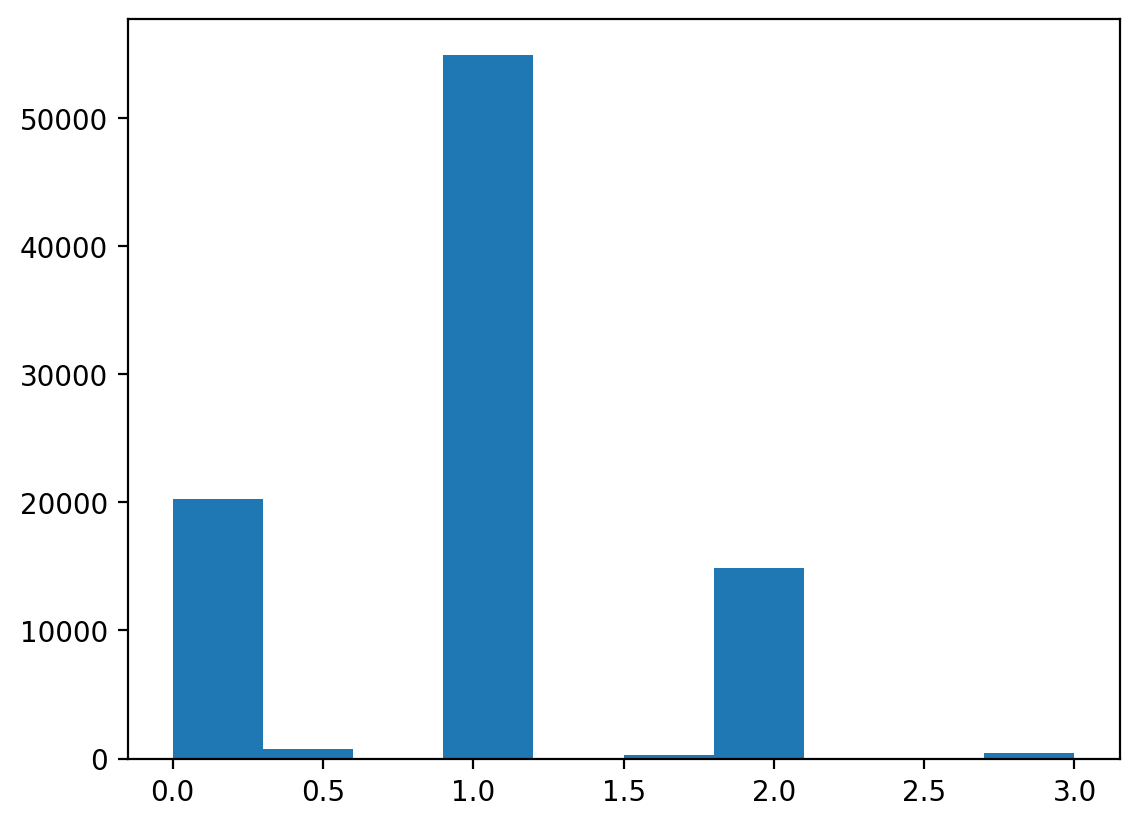

In [35]:
_df = length_df.groupby(["individual", "chrom", "pos", "length"])[["n/s"]].mean().reset_index()
_df["north"] = _df["n/s"]
plt.hist(_df.north)


In [72]:
mean_hap_df = length_df.groupby(["individual", "chrom", "pos", "length"])[["n/s"]].mean().reset_index()
mean_hap_df = mean_hap_df.rename(columns={"pos": "start"})
mean_hap_df["windows"] = mean_hap_df.start
mean_hap_df["north"] = mean_hap_df["n/s"]
mean_hap_df.head()

individual     chrom    start  length  n/s  windows  north
0    PD_0228  all_chrX  2500194  182517  1.0  2500194    1.0
1    PD_0228  all_chrX  2682711    3460  1.0  2682711    1.0
2    PD_0228  all_chrX  2686171   52047  1.0  2686171    1.0
3    PD_0228  all_chrX  2738218   42312  1.0  2738218    1.0
4    PD_0228  all_chrX  2780530   60745  1.0  2780530    1.0

In [73]:
# ind_test = mean_hap_df.loc[mean_hap_df.individual == "PD_0641"]
# for c in ind_test.chrom.unique():
#     c_sub = ind_test.loc[(ind_test.chrom == c) & (ind_test.windows >= 2500000)]
#     fig = horizonplot(c_sub, 'north', width=2, col='chrom', row='individual', size=0.3, aspect=100)

In [74]:
x_df = mean_hap_df.loc[mean_hap_df.chrom.isin(["all_chrX"])]
x_df.head()

individual     chrom    start  length  n/s  windows  north
0    PD_0228  all_chrX  2500194  182517  1.0  2500194    1.0
1    PD_0228  all_chrX  2682711    3460  1.0  2682711    1.0
2    PD_0228  all_chrX  2686171   52047  1.0  2686171    1.0
3    PD_0228  all_chrX  2738218   42312  1.0  2738218    1.0
4    PD_0228  all_chrX  2780530   60745  1.0  2780530    1.0

In [75]:
autosomal_df = mean_hap_df.loc[~mean_hap_df.chrom.isin(["all_chrX", "female_chrX"])]
autosomal_df.head()

Empty DataFrame
Columns: [individual, chrom, start, length, n/s, windows, north]
Index: []

In [76]:
x_df["fragment_weight_x"] = x_df["n/s"]*x_df["length"]
x_df.head()

individual     chrom    start  length  n/s  windows  north  \
0    PD_0228  all_chrX  2500194  182517  1.0  2500194    1.0   
1    PD_0228  all_chrX  2682711    3460  1.0  2682711    1.0   
2    PD_0228  all_chrX  2686171   52047  1.0  2686171    1.0   
3    PD_0228  all_chrX  2738218   42312  1.0  2738218    1.0   
4    PD_0228  all_chrX  2780530   60745  1.0  2780530    1.0   

   fragment_weight_x  
0           182517.0  
1             3460.0  
2            52047.0  
3            42312.0  
4            60745.0

In [77]:
x_length = x_df.loc[x_df.individual == "PD_0228"].length.sum()
x_length

141162670

In [78]:
percentage_north_x = ((x_df.groupby(by=["individual"])[["fragment_weight_x"]].sum()+x_length)/(2*x_length))

In [79]:
percentage_north_x.sort_values(by="fragment_weight_x", ascending=False)

fragment_weight_x
individual                   
PD_0751              1.037355
PD_0785              1.036641
PD_0787              1.036577
PD_0786              1.035736
PD_0779              1.035302
...                       ...
PD_0727              0.824794
PD_0722              0.816817
PD_0735              0.815956
PD_0743              0.815206
Sci_30877            0.530832

[67 rows x 1 columns]

In [80]:
autosomal_df["fragment_weight_aut"] = autosomal_df["n/s"]*autosomal_df["length"]
aut_length = autosomal_df.loc[autosomal_df.individual == "PD_0228"].length.sum()

In [81]:
percentage_north_aut = ((autosomal_df.groupby(by=["individual"])[["fragment_weight_aut"]].sum()+aut_length)/(2*aut_length))

In [82]:
percentage_north_aut

Empty DataFrame
Columns: [fragment_weight_aut]
Index: []

In [83]:
x_aut_percent = percentage_north_x.merge(right=percentage_north_aut, on="individual")

In [84]:
x_aut_percent["mean_percent"] = (x_aut_percent.fragment_weight_x+x_aut_percent.fragment_weight_aut)/2
sort_aut_x = x_aut_percent.sort_values(by="mean_percent", ascending=False).reset_index()

In [85]:
aut_sort = sort_aut_x[["individual", "fragment_weight_aut", "mean_percent"]]
aut_sort = aut_sort.rename(columns={"fragment_weight_aut": "North Percentage"})
aut_sort["chrom"] = "autosome"
x_sort = sort_aut_x[["individual", "fragment_weight_x", "mean_percent"]]
x_sort = x_sort.rename(columns={"fragment_weight_x": "North Percentage"})
x_sort["chrom"] = "chrX"
concat_df = pd.concat([aut_sort, x_sort])

In [86]:
concat_df

Empty DataFrame
Columns: [individual, North Percentage, mean_percent, chrom]
Index: []

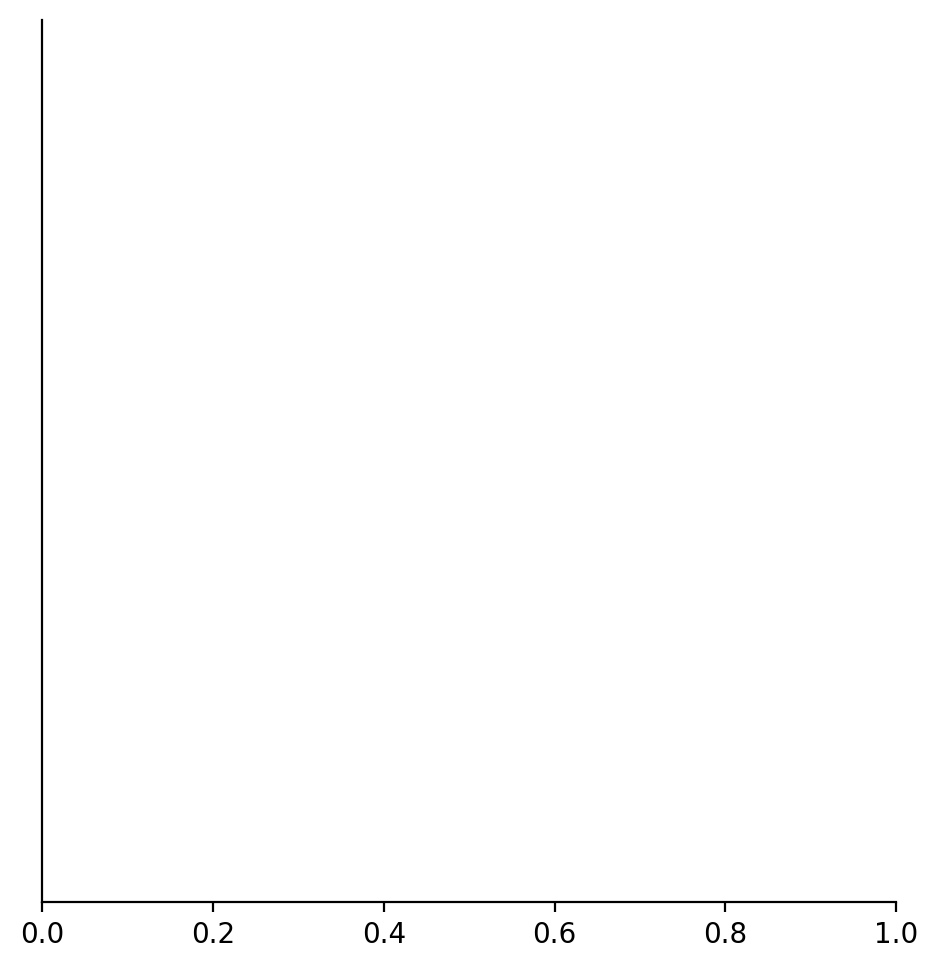

In [87]:
ax = sns.catplot(data=concat_df, x="North Percentage", y="individual", hue="chrom", kind="swarm", legend_out=False)
ax.set(yticks=[], ylabel=None)

Cant sort horizonplot, as fas as I can see

In [88]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering_sci.txt", sep =" ")
rfmix_path = "../steps/rfmix_gen100/eth_olive_focus/"
mapping_df = pd.read_csv(rfmix_path + "ref_names.txt", sep = "\t", names=["ID", "Origin"])

In [36]:
df_l = []
# for chrom in ["chr{}".format(x) for x in (range(10, 21))]+["all_chrX", "female_chrX"]:
for chrom in ["chr{}".format(x) for x in (range(10, 21))]+["all_chrX"]:
    print(chrom)


    if chrom != 'all_chrX':
        continue
    
    input_file = rfmix_path + "{}.msp.tsv".format(chrom)
    chr_df = pd.read_csv(input_file, sep = "\t", header=1)
    file = open(input_file, 'r')
    line1 = file.readline()
    file.close()
    number_subpop_mapping = {}
    for subpop in line1.strip().split("\t"):
        # Splitting to create lists containing two values - subpop and number.
        subpop_number = subpop.split(": ")[-1].split("=")
        number_subpop_mapping[int(subpop_number[1])] = subpop_number[0]
    for hap in chr_df.columns[6:]:
        paint_df = create_paint_df_ind(chr_df, hap, number_subpop_mapping, north_south_mapping)
        paint_df["chrom"] = "{}".format(chrom)
        df_l.append(paint_df)
length_df = pd.concat(df_l)
length_df.head()

chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
all_chrX


pos  end_pos  length         reference  n/s individual haplotype  \
0  2500194  2682710  182517  Anubis, Tanzania    0  Sci_30877         0   
1  2682711  2686170    3460  Anubis, Tanzania    0  Sci_30877         0   
2  2686171  2738217   52047  Anubis, Tanzania    0  Sci_30877         0   
3  2738218  2780529   42312  Anubis, Tanzania    0  Sci_30877         0   
4  2780530  2841274   60745  Anubis, Tanzania    0  Sci_30877         0   

      chrom  
0  all_chrX  
1  all_chrX  
2  all_chrX  
3  all_chrX  
4  all_chrX

In [37]:
window_df_l = []
for chrom in length_df.chrom.unique():
    print(chrom)
    chrom_df = length_df.loc[length_df.chrom == "{}".format(chrom)]
    pops = chrom_df.reference.unique()
    for ind in chrom_df.individual.unique():
        ind_df = chrom_df.loc[chrom_df.individual == ind]
        window_df_ind = length_to_windows(ind_df, pops)
        window_df_ind["chrom"] = "{}".format(chrom)
        window_df_ind["individual"] = ind
        window_df_l.append(window_df_ind)
window_df = pd.concat(window_df_l)
window_df.head()

all_chrX


windows  Anubis, Tanzania  Hamadryas, Ethiopia  \
0  2500194          200000.0                  0.0   
1  2600194          200000.0                  0.0   
2  2700194          200000.0                  0.0   
3  2800194          200000.0                  0.0   
4  2900194          200000.0                  0.0   

   Cynocephalus, Central Tanzania  Papio, Senegal     chrom individual  
0                             0.0             0.0  all_chrX  Sci_30877  
1                             0.0             0.0  all_chrX  Sci_30877  
2                             0.0             0.0  all_chrX  Sci_30877  
3                             0.0             0.0  all_chrX  Sci_30877  
4                             0.0             0.0  all_chrX  Sci_30877

In [38]:
window_df["Origin"] = window_df.individual.map(dict(zip(meta_data_samples.PGDP_ID,
                                                        meta_data_samples.Origin)))
window_df["north"] = window_df["Hamadryas, Ethiopia"]+window_df["Papio, Senegal"]
assert len(north_south_mapping) == 4
window_df["norm_north"] = (window_df.north-window_df.iloc[:,1:5].sum(axis=1)/2)
window_df["start"] = window_df["windows"]
window_df.head()

windows  Anubis, Tanzania  Hamadryas, Ethiopia  \
0  2500194          200000.0                  0.0   
1  2600194          200000.0                  0.0   
2  2700194          200000.0                  0.0   
3  2800194          200000.0                  0.0   
4  2900194          200000.0                  0.0   

   Cynocephalus, Central Tanzania  Papio, Senegal     chrom individual  \
0                             0.0             0.0  all_chrX  Sci_30877   
1                             0.0             0.0  all_chrX  Sci_30877   
2                             0.0             0.0  all_chrX  Sci_30877   
3                             0.0             0.0  all_chrX  Sci_30877   
4                             0.0             0.0  all_chrX  Sci_30877   

            Origin  north  norm_north    start  
0  Aberdare, Kenya    0.0   -100000.0  2500194  
1  Aberdare, Kenya    0.0   -100000.0  2600194  
2  Aberdare, Kenya    0.0   -100000.0  2700194  
3  Aberdare, Kenya    0.0   -100000.0  2800194  
4  Aberdare, Kenya    0.0   -100000.0  2900194

In [39]:
#window_df.to_csv("../steps/rfmix_v3_chrX_windowed_df.txt", index=False)

In [123]:
_df = (meta_data_samples
       .loc[meta_data_samples.C_origin.isin(list(north_south_mapping.keys()))]
       .groupby('Species')
       .apply(lambda df: df.Origin.unique())
       .to_frame('Pop')
       .reset_index()
      )
for tup in _df.itertuples():
    print(tup.Species.capitalize())
    print('\t'+"\n\t".join(tup.Pop))

Anubis
	Serengeti, Tanzania
	Arusha, Tanzania
	Ngorongoro, Tanzania
	Gombe, Tanzania
	Lake Manyara, Tanzania
	Tarangire, Tanzania
Cynocephalus
	Mikumi, Tanzania
	Ruaha, Tanzania
	Udzungwa, Tanzania
	Selous, Tanzania
Hamadryas
	Awash, Ethiopia
	Filoha, Ethiopia
Papio
	Niokolo-Koba, Senegal


Query populations:

In [95]:
_df = (meta_data_samples
       .loc[~meta_data_samples.C_origin.isin(list(north_south_mapping.keys()))]
       .groupby('Species')
       .apply(lambda df: df.Origin.unique())
       .to_frame('Pop')
       .reset_index()
      )
for tup in _df.itertuples():
    if tup.Species != 'gelada':
        print(tup.Species.capitalize())
        print('\t'+"\n\t".join(tup.Pop))

Anubis
	Aberdare, Kenya
	Gog Woreda, Gambella region, Ethiopia
Cynocephalus
	Mahale, Tanzania
	Katavi, Tanzania
	Issa Valley, Tanzania
Kindae
	Chunga, Zambia
Ursinus (grayfoot)
	Dendro Park, Zambia


In [114]:
female_olives = meta_data_samples.loc[(meta_data_samples.Species== "anubis") & (meta_data_samples.Sex== "F")].PGDP_ID
female_yellows = meta_data_samples.loc[(meta_data_samples.Species== "cynocephalus") & (meta_data_samples.Sex== "F")].PGDP_ID

In [115]:
olive_ids = meta_data_samples.loc[meta_data_samples.Species== "anubis"].PGDP_ID
yellow_ids = meta_data_samples.loc[meta_data_samples.Species== "cynocephalus"].PGDP_ID
kindae_ids = meta_data_samples.loc[meta_data_samples.Species== "kindae"].PGDP_ID
chacma_ids = meta_data_samples.loc[meta_data_samples.Species== "ursinus (grayfoot)"].PGDP_ID
papio_ids = meta_data_samples.loc[meta_data_samples.Species== "papio"].PGDP_ID
hamadryas_ids = meta_data_samples.loc[meta_data_samples.Species== "hamadryas"].PGDP_ID

### Olive

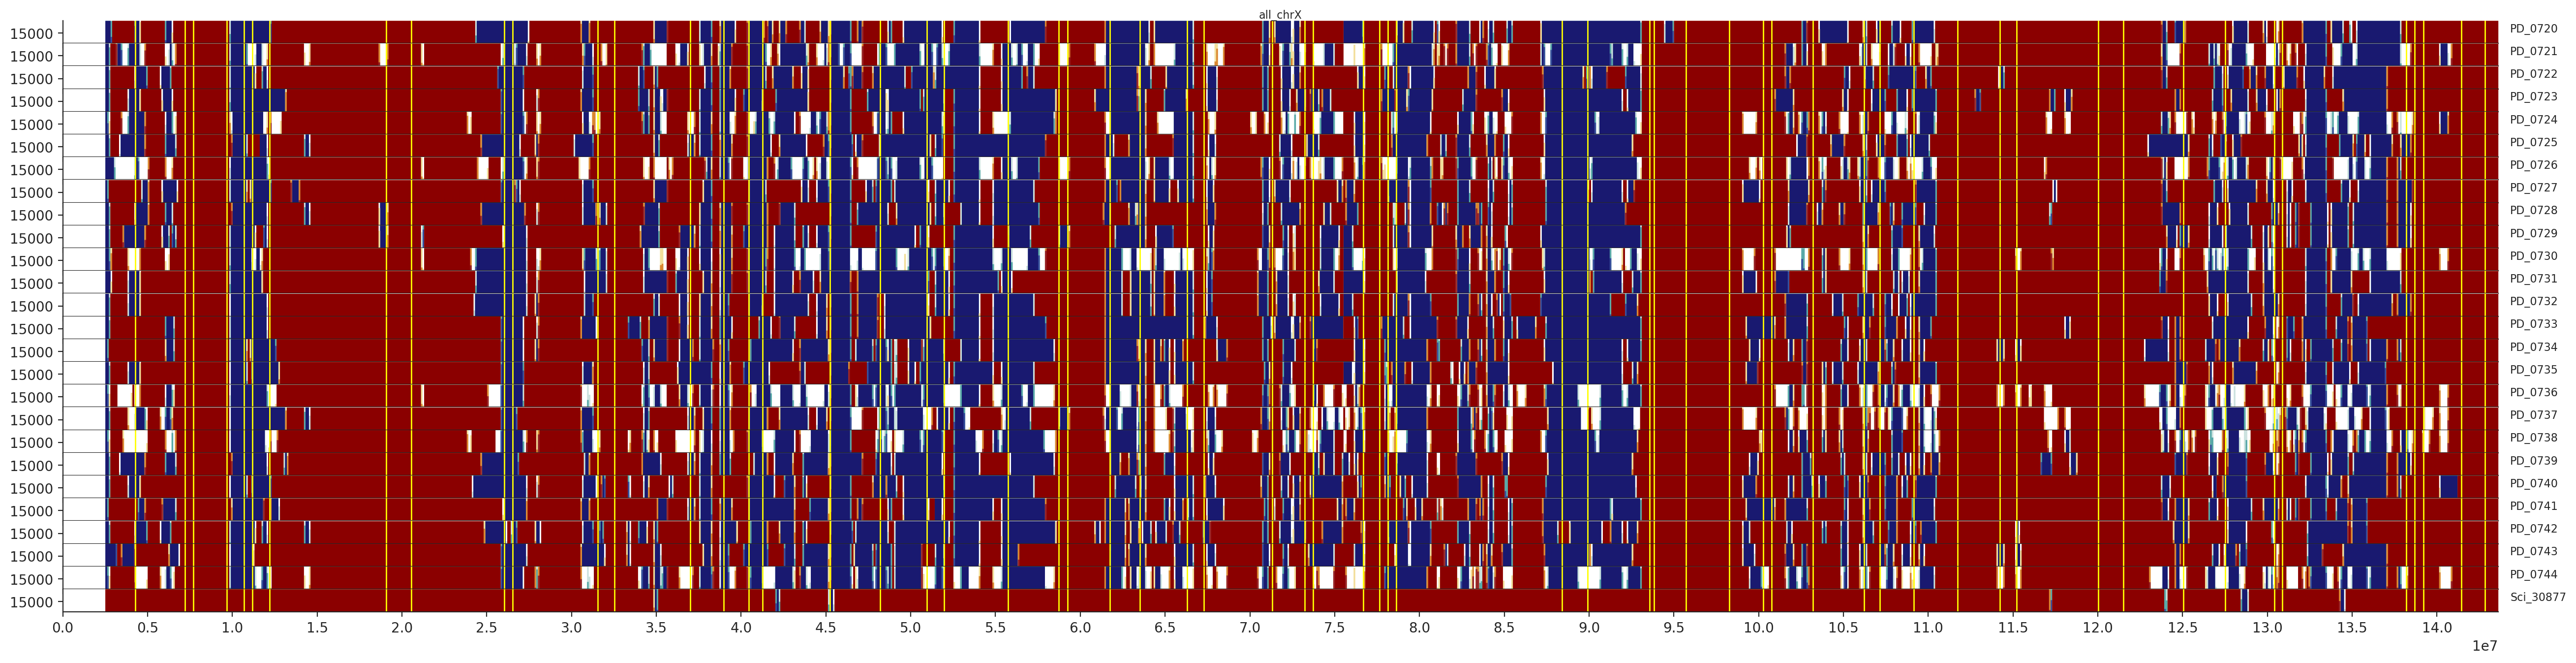

In [117]:
plot_df = window_df.loc[window_df.individual.isin(olive_ids)]
fig = horizonplot(plot_df, 'norm_north', width=2, col='chrom', row='individual', size=0.3, aspect=100, cut=33000)
ax = fig.axes[-1]      
ax.ticklabel_format(style='sci', axis='x', scilimits=(7,7))
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 5_000_000))

for pos in ab_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='yellow', linewidth=1)

### Yellow

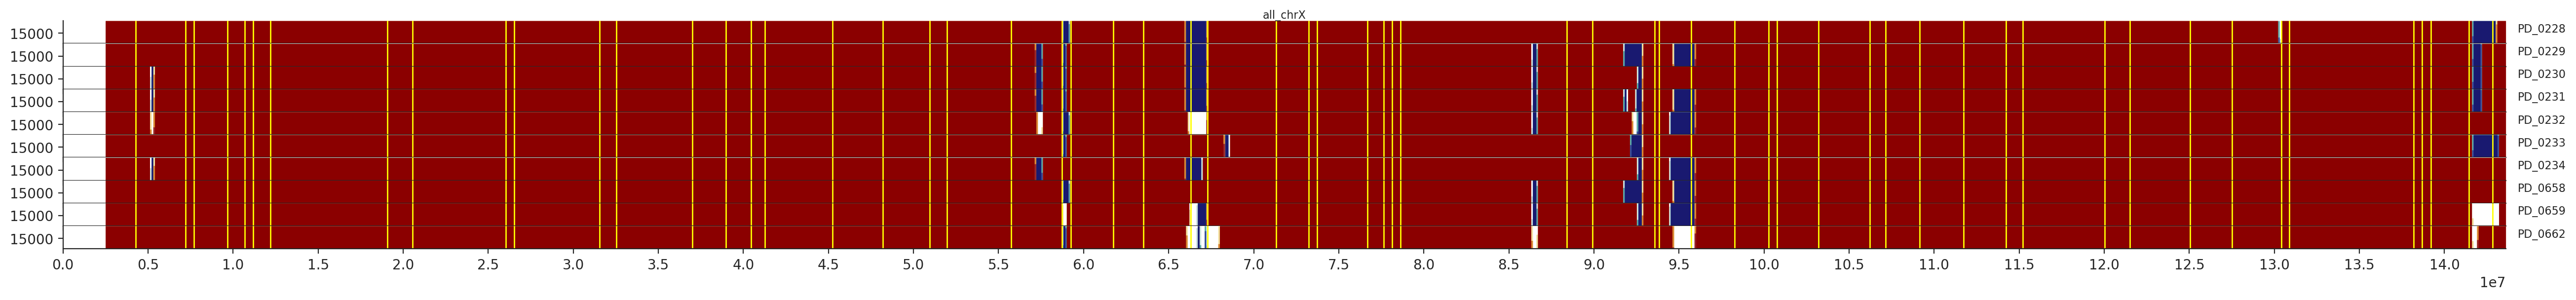

In [118]:
plot_df = window_df.loc[window_df.individual.isin(yellow_ids)]
fig = horizonplot(plot_df, 'norm_north', width=2, col='chrom', row='individual', size=0.3, aspect=100, cut=33000)
ax = fig.axes[-1]      
ax.ticklabel_format(style='sci', axis='x', scilimits=(7,7))
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 5_000_000))

for pos in ab_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='yellow', linewidth=1)

### Kindae

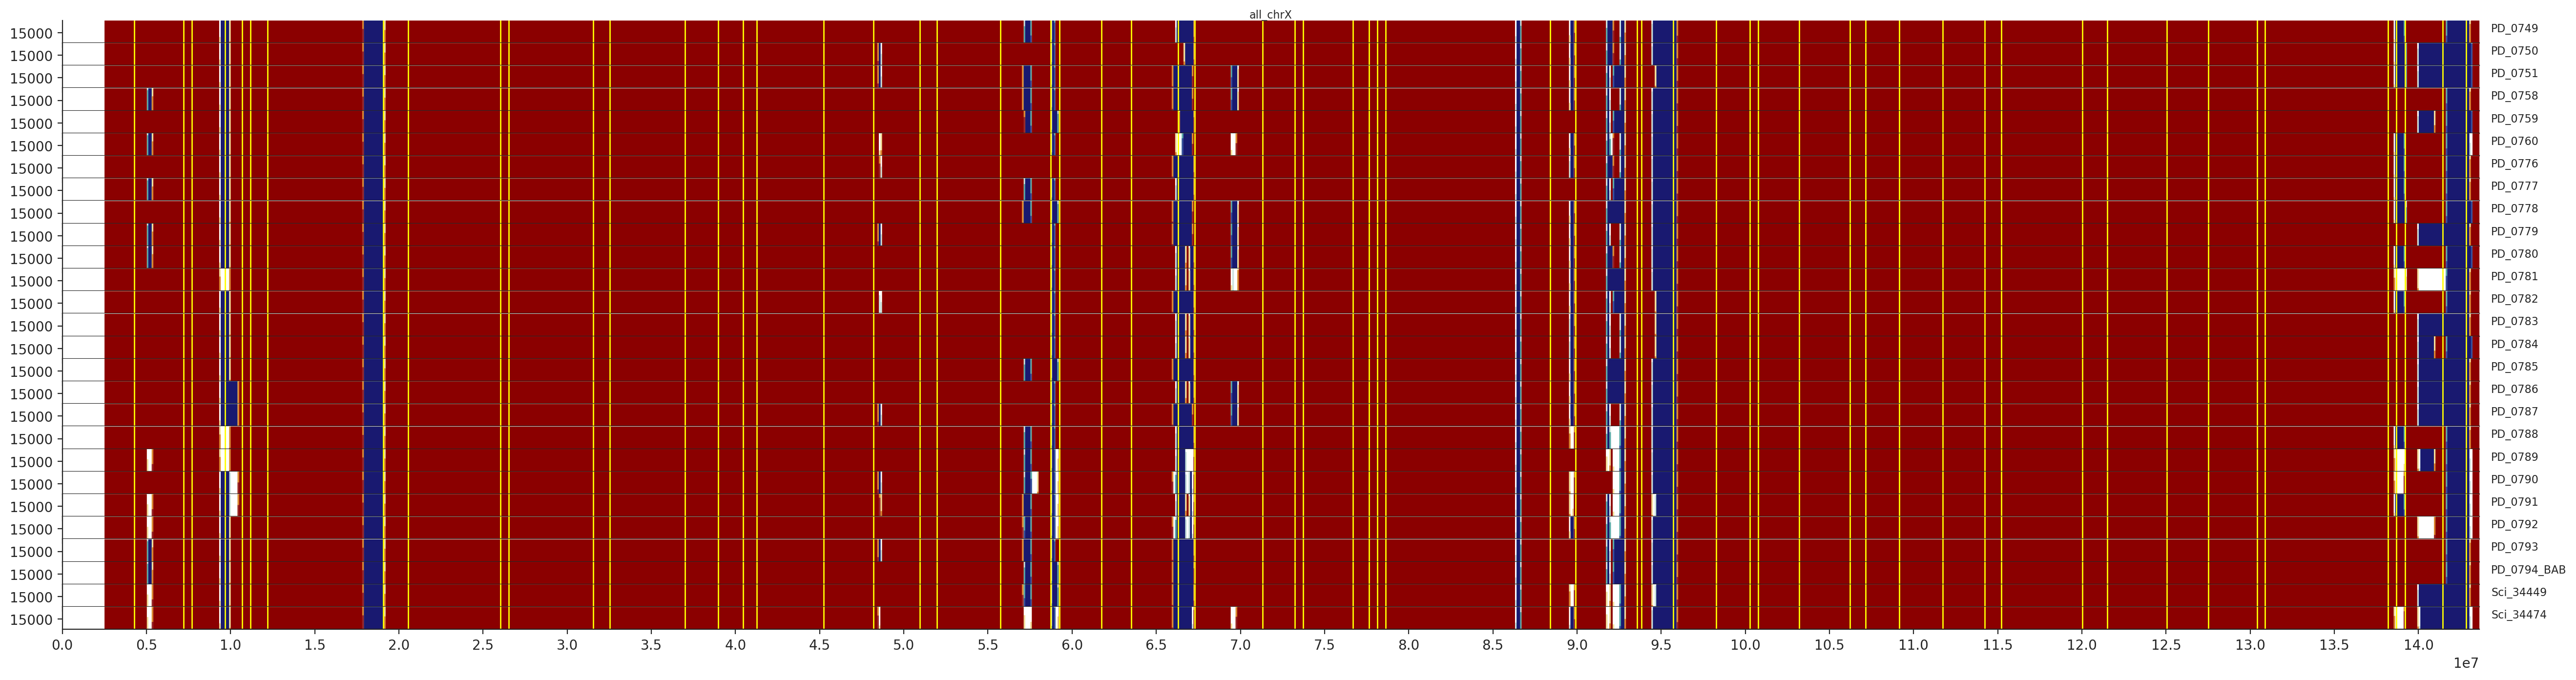

In [119]:
plot_df = window_df.loc[window_df.individual.isin(kindae_ids)]
fig = horizonplot(plot_df, 'norm_north', width=2, col='chrom', row='individual', size=0.3, aspect=100, cut=33000)
ax = fig.axes[-1]      
ax.ticklabel_format(style='sci', axis='x', scilimits=(7,7))
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 5_000_000))

for pos in ab_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='yellow', linewidth=1)

### Chacma

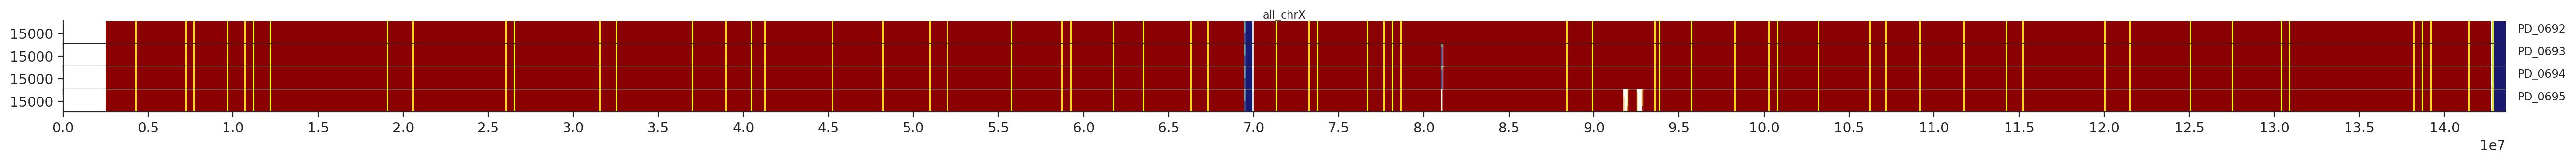

In [120]:
plot_df = window_df.loc[window_df.individual.isin(chacma_ids)]
fig = horizonplot(plot_df, 'norm_north', width=2, col='chrom', row='individual', size=0.3, aspect=100, cut=33000)
ax = fig.axes[-1]      
ax.ticklabel_format(style='sci', axis='x', scilimits=(7,7))
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 5_000_000))

for pos in ab_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='yellow', linewidth=1)

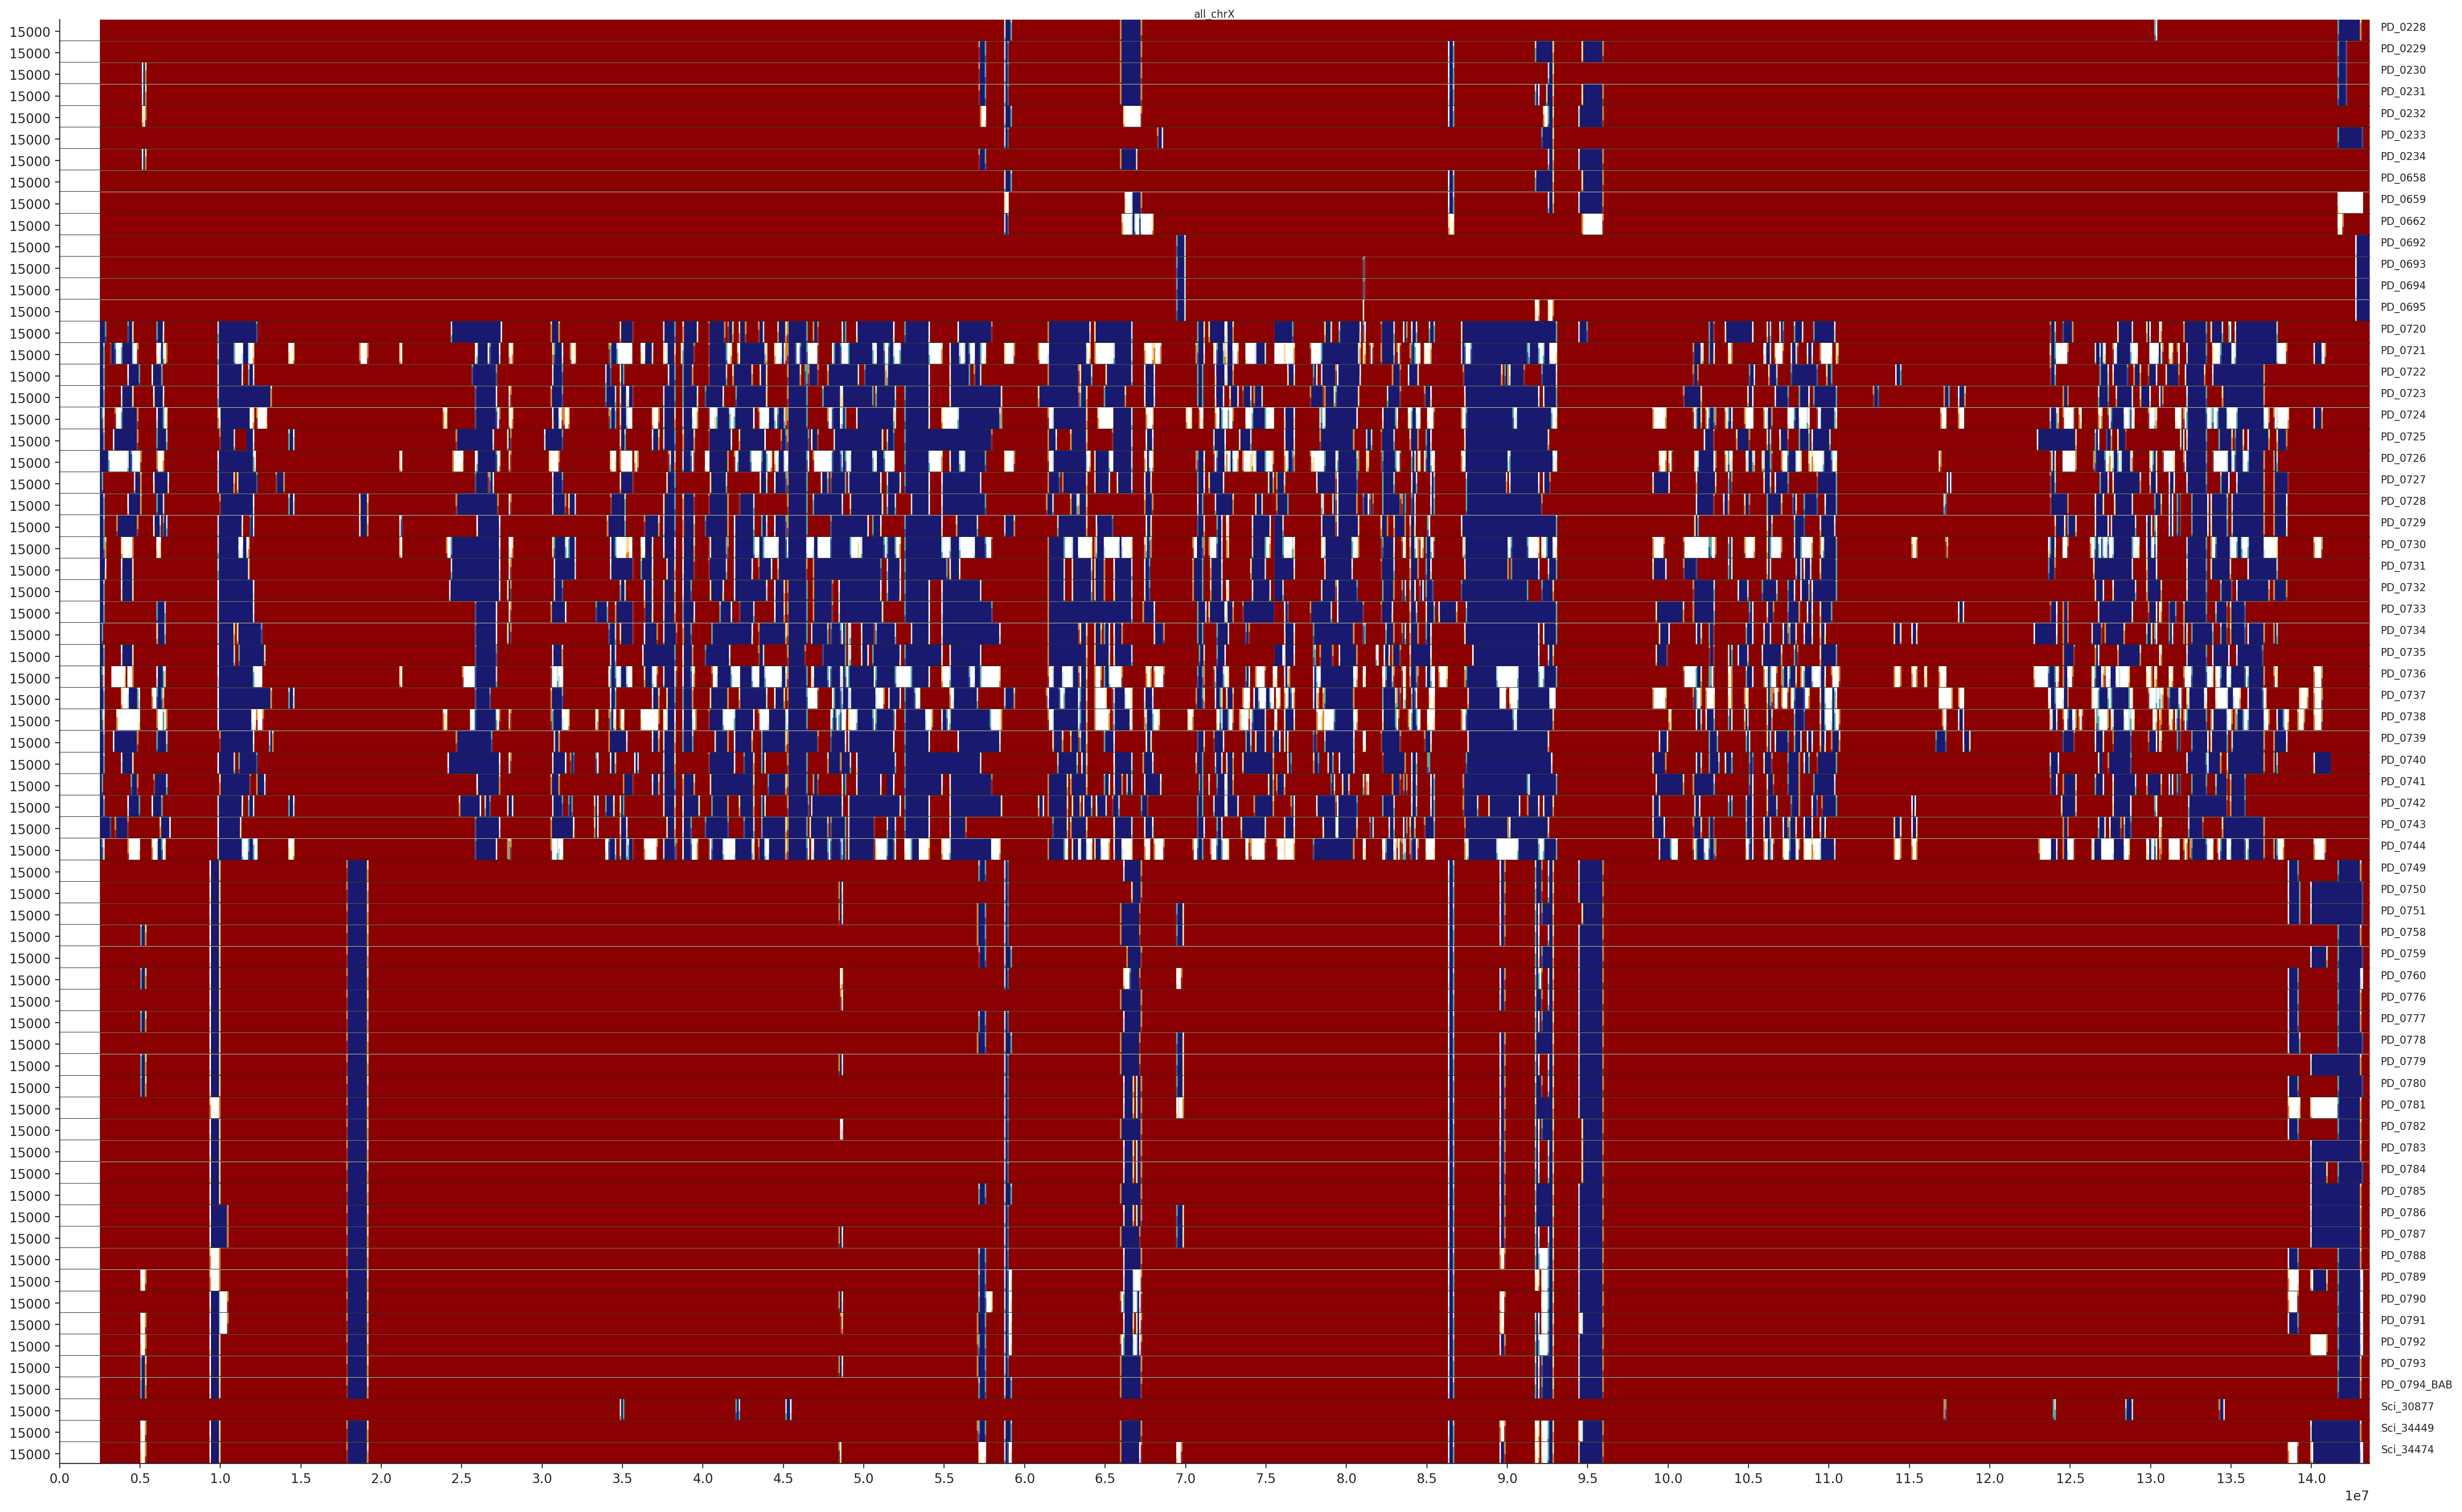

In [185]:
#female_chrX = window_df.loc[window_df.chrom == "female_chrX"]
fig = horizonplot(window_df, 'norm_north', width=2, col='chrom', row='individual', size=0.3, aspect=100, cut=33000)
ax = fig.axes[-1]      
ax.ticklabel_format(style='sci', axis='x', scilimits=(7,7))
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 5_000_000)) ;

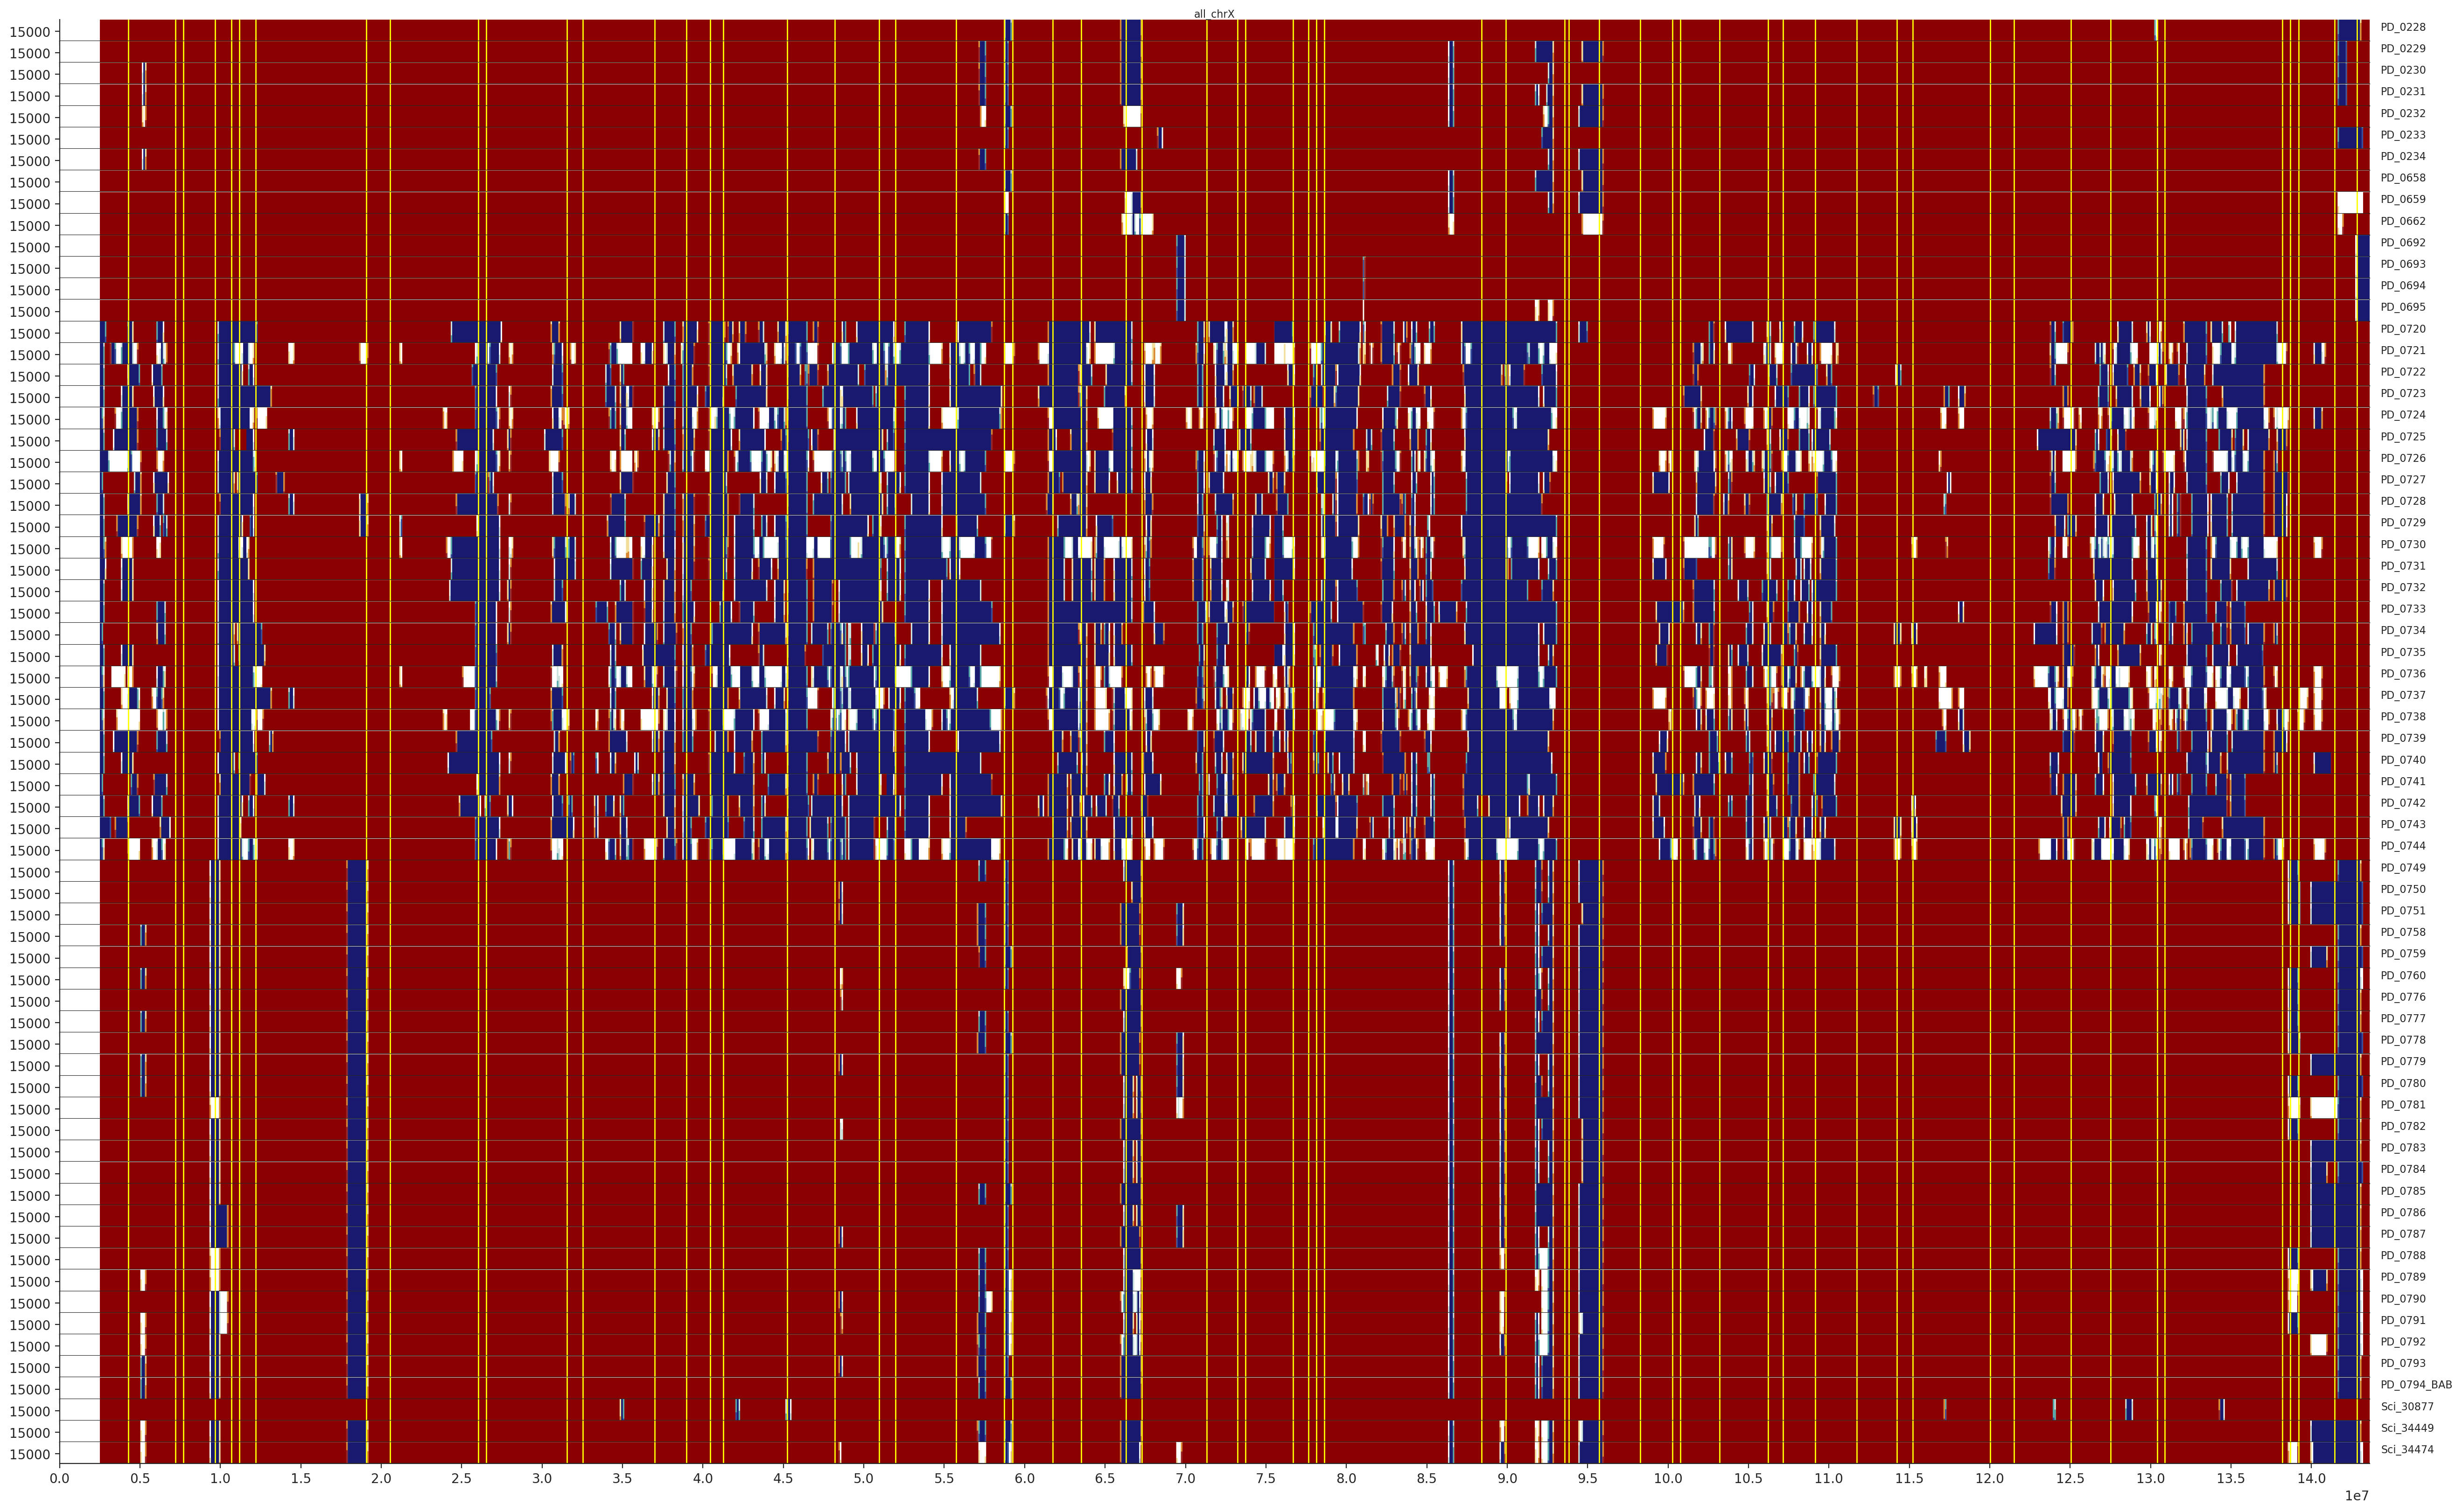

In [186]:
for pos in ab_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='yellow', linewidth=1)

# scaling = ab_transitions_mapped.approx_pos.max() / ab_regions.end.max()

# for pos in ab_regions.end:
#     for ax in fig.axes:
#         ax.axvline(pos * scaling, color='magenta', linewidth=1)        
fig

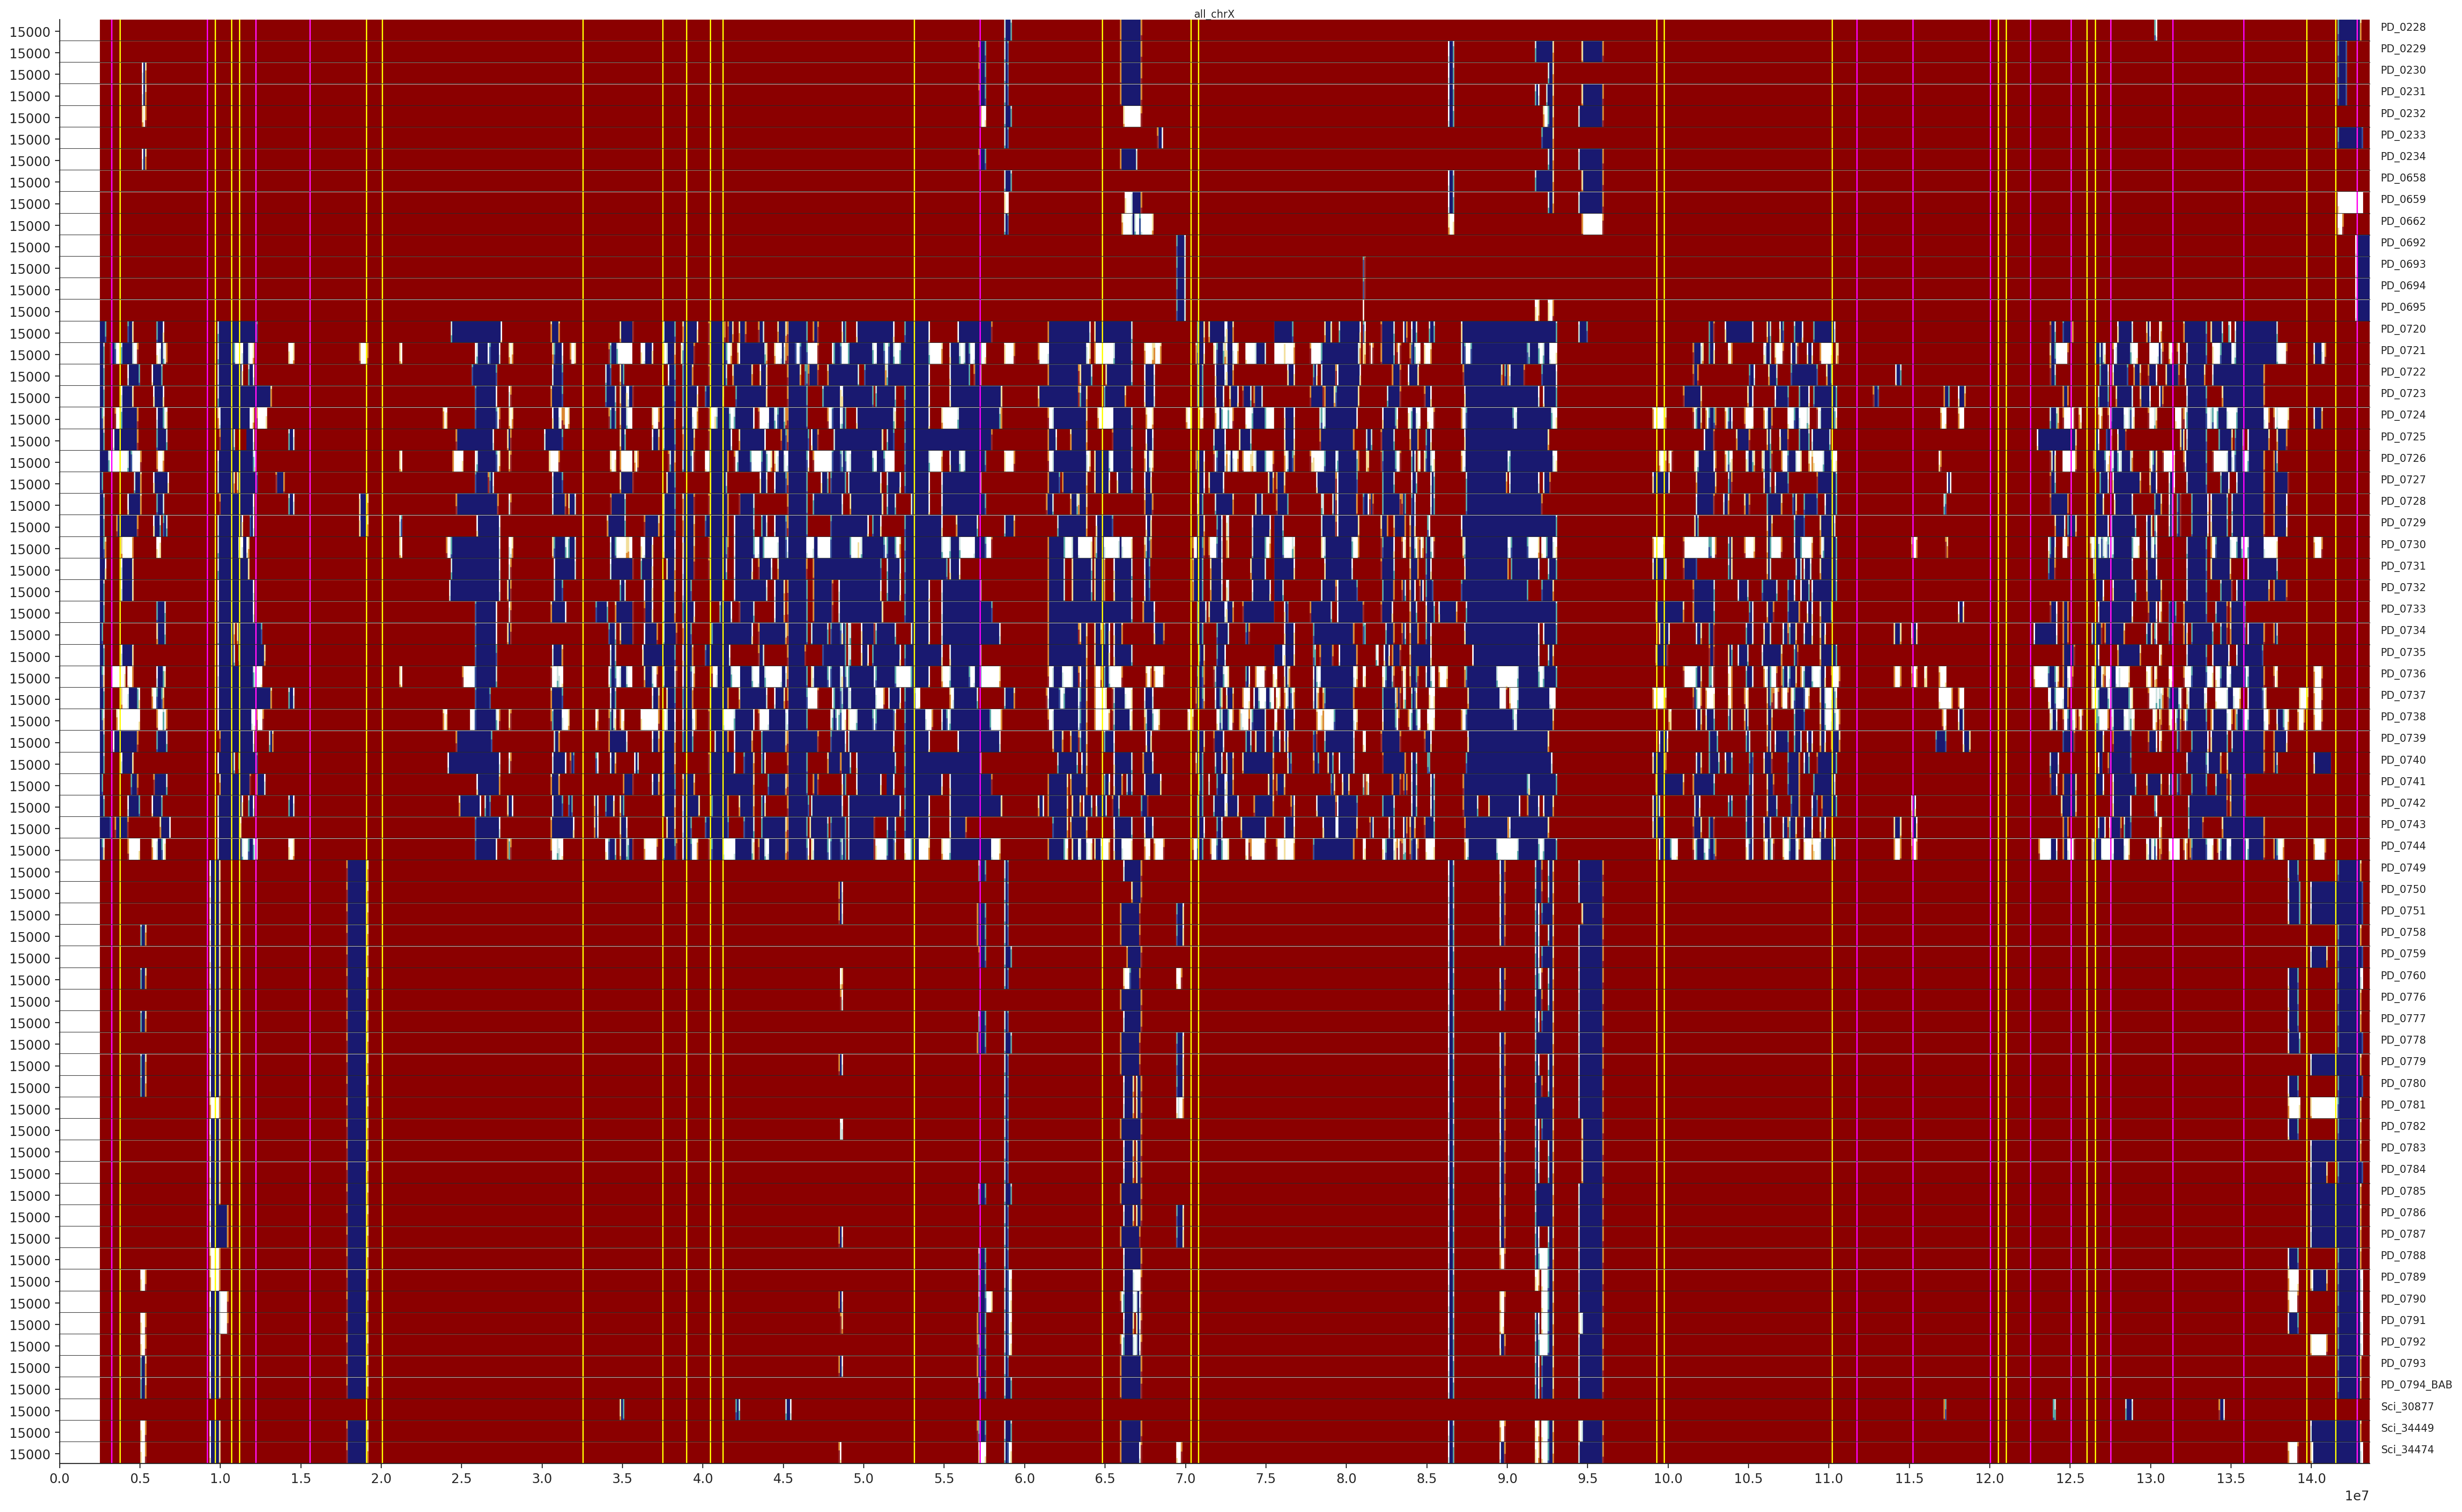

In [106]:
for pos in tad_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='magenta', linewidth=1)
fig

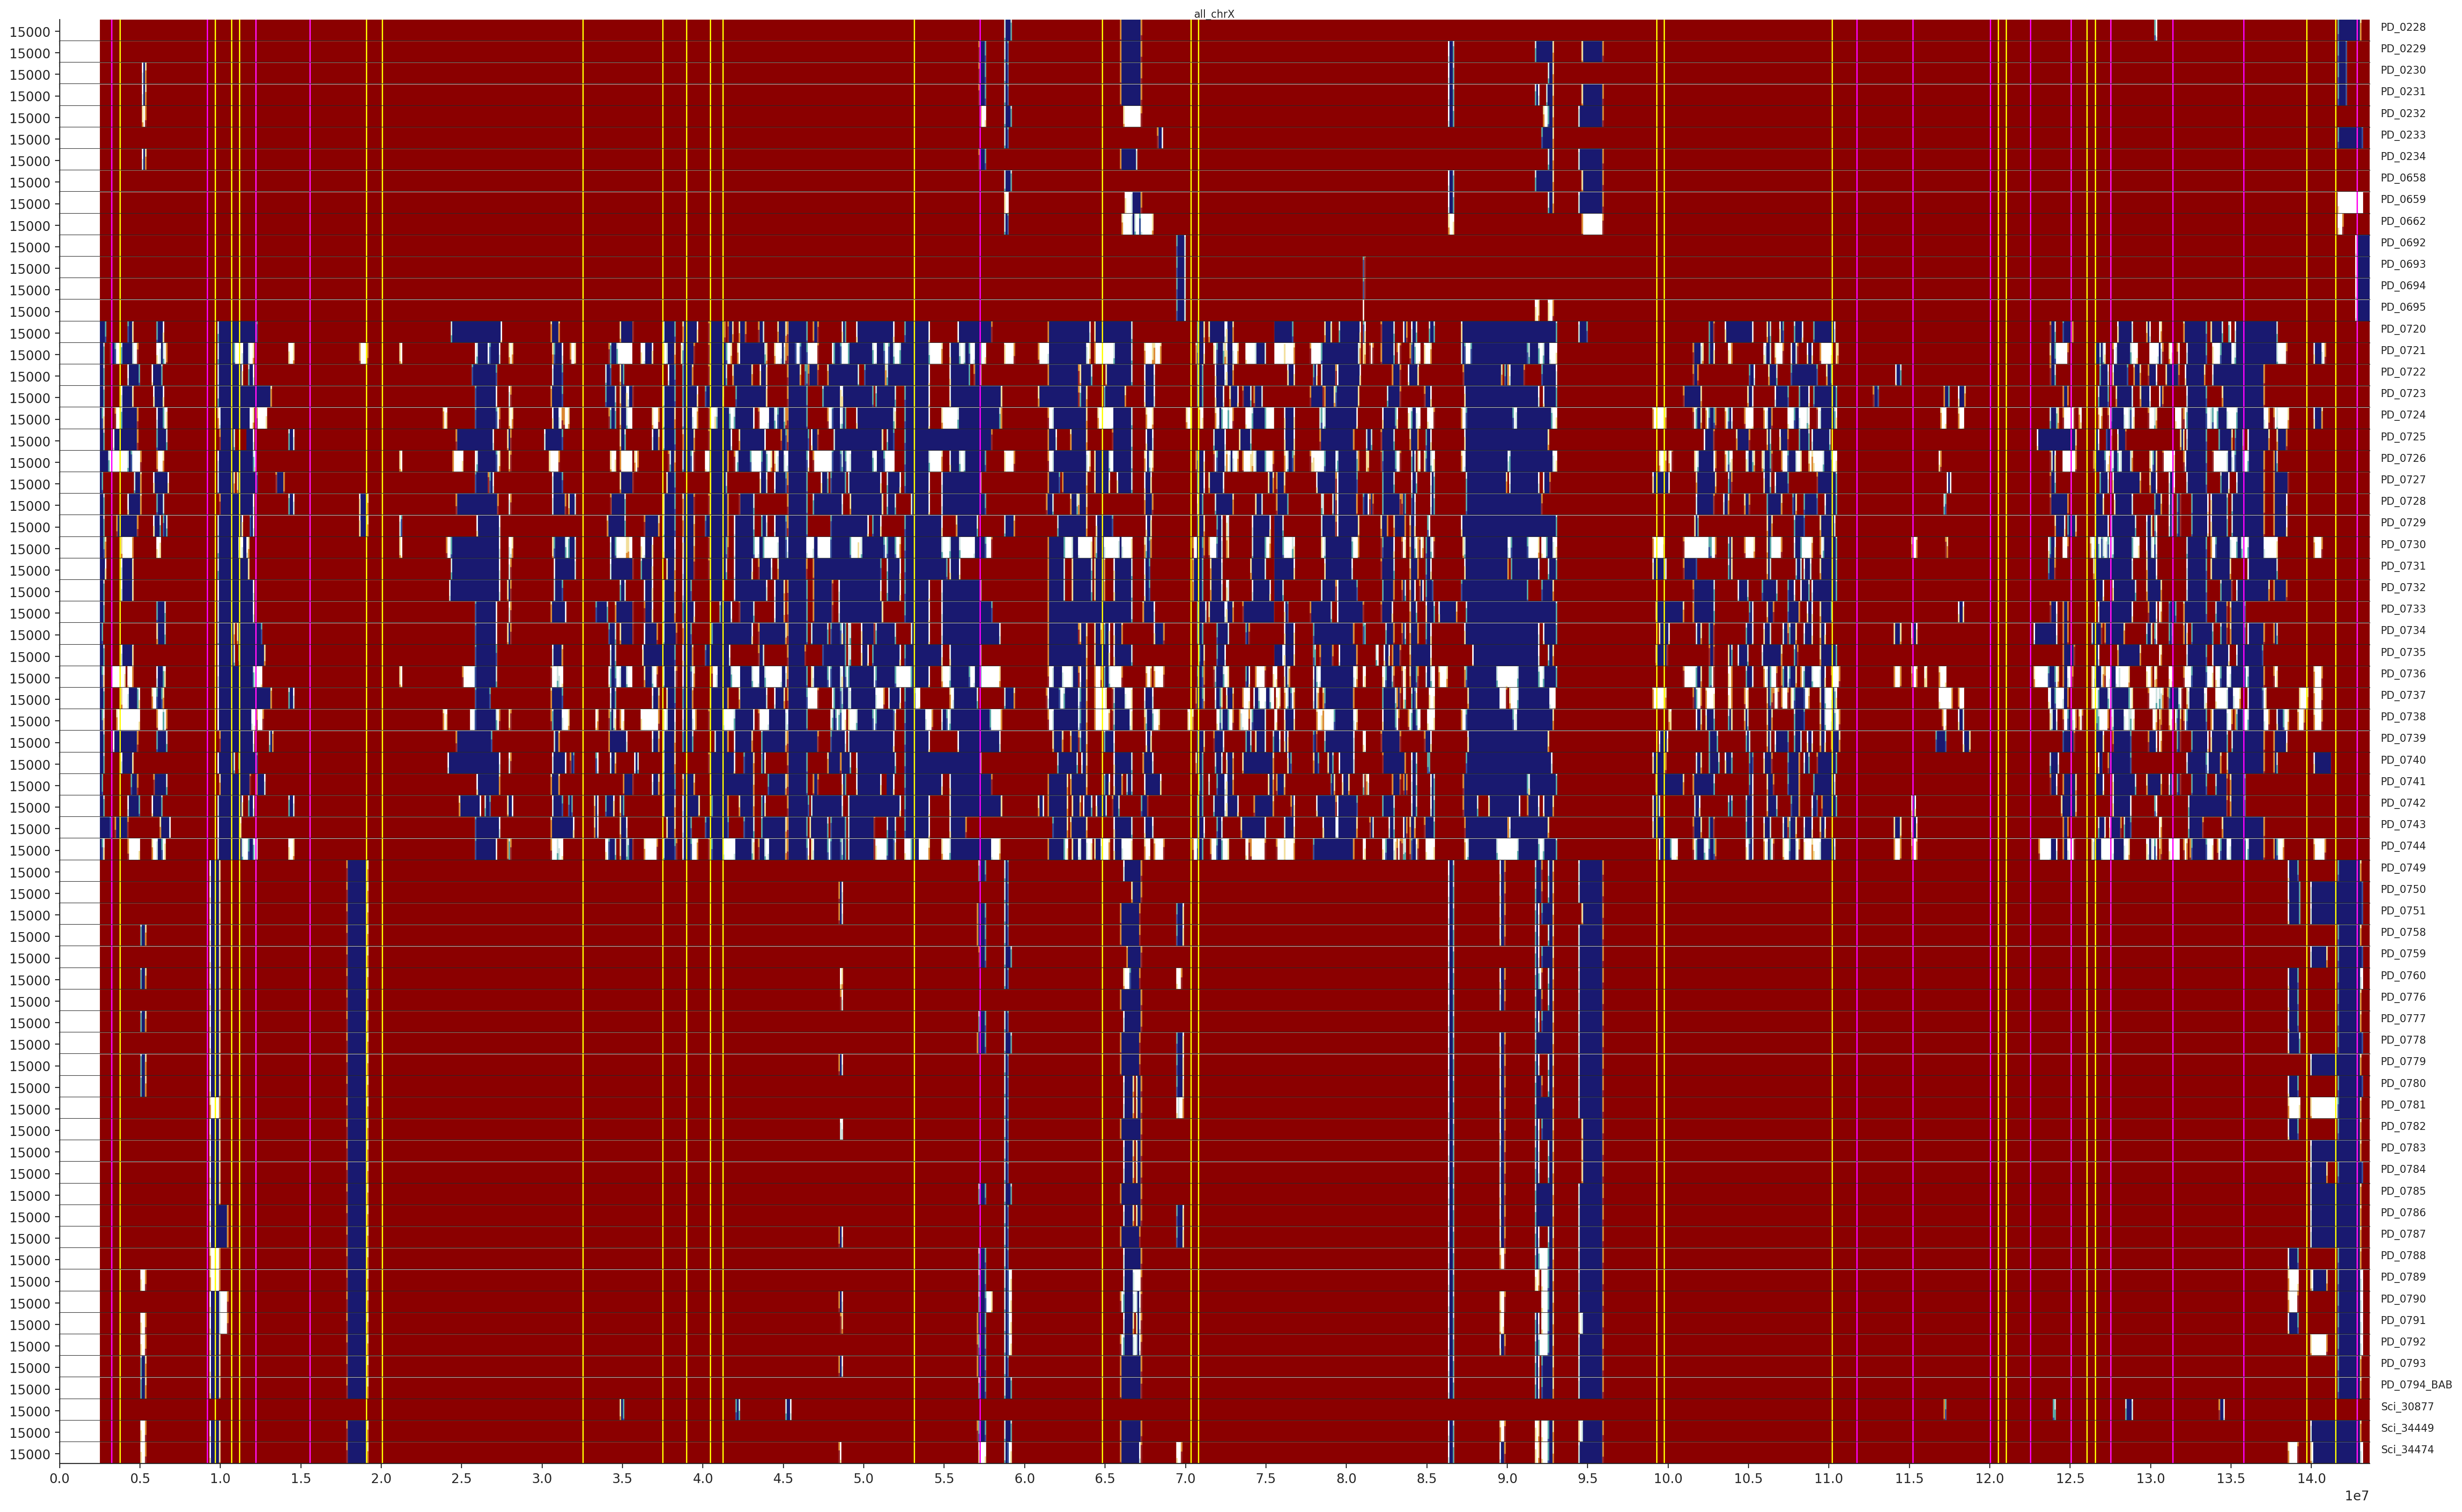

In [108]:
fig = horizonplot(window_df, 'norm_north', width=2, col='chrom', row='individual', size=0.3, aspect=100, cut=33000)
ax = fig.axes[-1]      
ax.ticklabel_format(style='sci', axis='x', scilimits=(7,7))
ax.set_xticks(np.arange(0, ax.get_xlim()[1], 5_000_000)) ;
for pos in ab_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='yellow', linewidth=1)
for pos in tad_transitions_mapped.approx_pos:
    for ax in fig.axes:
        ax.axvline(pos, color='magenta', linewidth=1)        
plt.savefig('aurora.pdf')

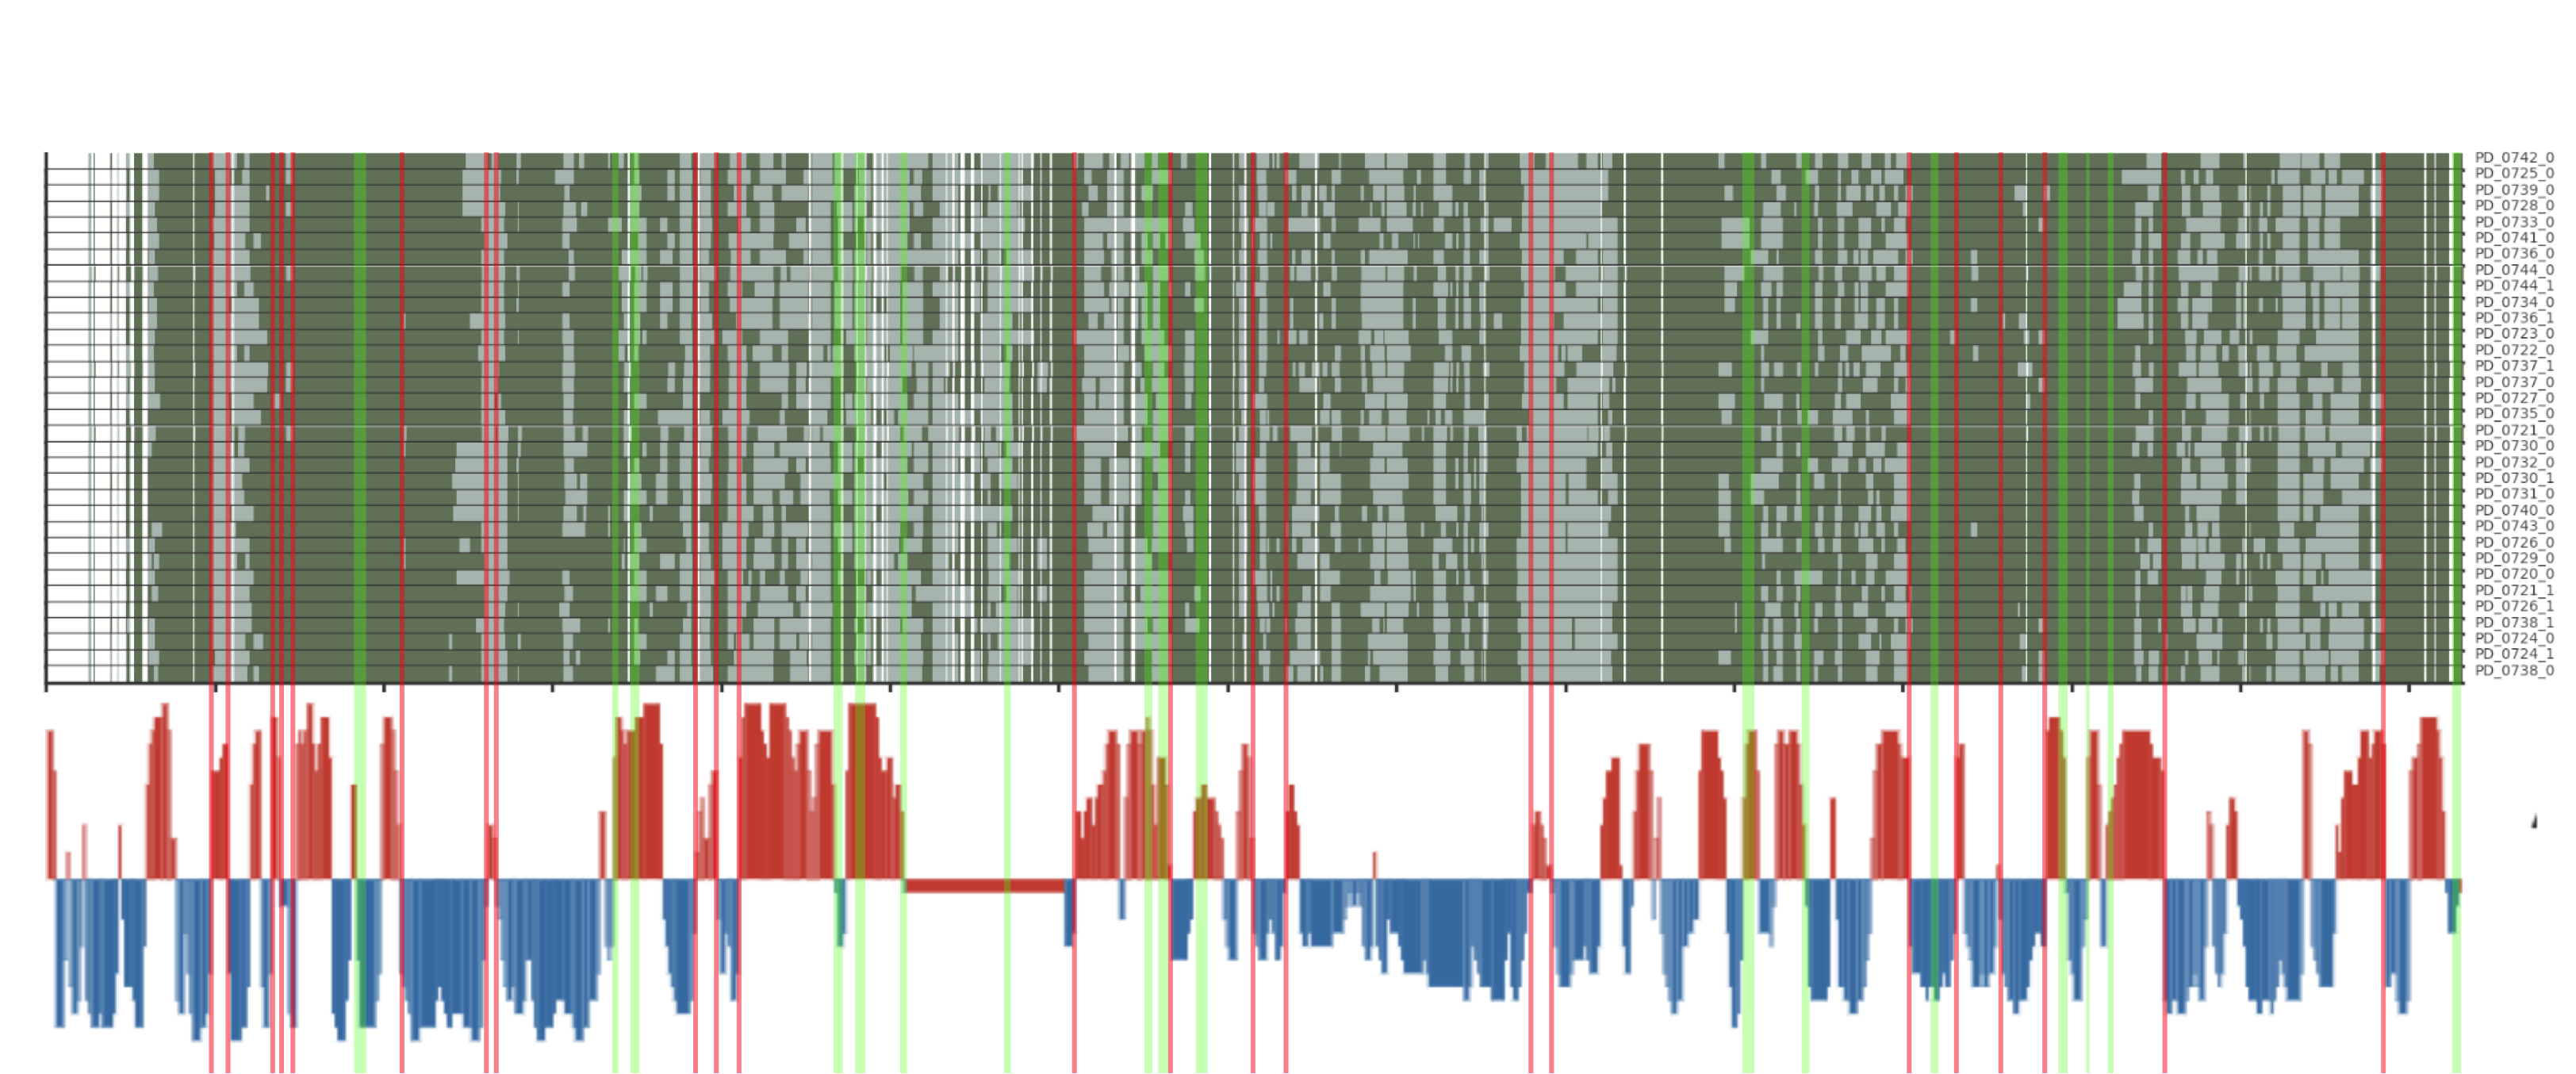

In [18]:
sample_name_list = [f'sample{i}' for i in range(50)]
seq_window_list = np.concatenate([np.random.choice([0, 1], size=600, p=[0.9, 0.1]).reshape(15, -1), 
                                  np.random.choice([0, 1], size=400, p=[0.7, 0.3]).reshape(10, -1),                                  
                                  np.random.choice([0, 1], size=400, p=[0.3, 0.7]).reshape(10, -1),
                                  np.random.choice([0, 1], size=600, p=[0.1, 0.9]).reshape(15, -1)])
print(sample_name_list[:5], '...')
print(seq_window_list)
plt.figure(figsize=(5, 6))
plt.imshow(seq_window_list, aspect='auto') ;

['sample0', 'sample1', 'sample2', 'sample3', 'sample4'] ...
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]]


Index of sorted haplotypes: [8, 9, 2, 0, 6, 14, 3, 4, 11, 1, 13, 7, 5, 12, 16, 19, 10, 24, 15, 22, 21, 17, 23, 20, 18, 26, 27, 30, 32, 28, 34, 37, 29, 25, 33, 42, 31, 35, 47, 38, 40, 49, 41, 44, 45, 43, 46, 36, 39, 48]


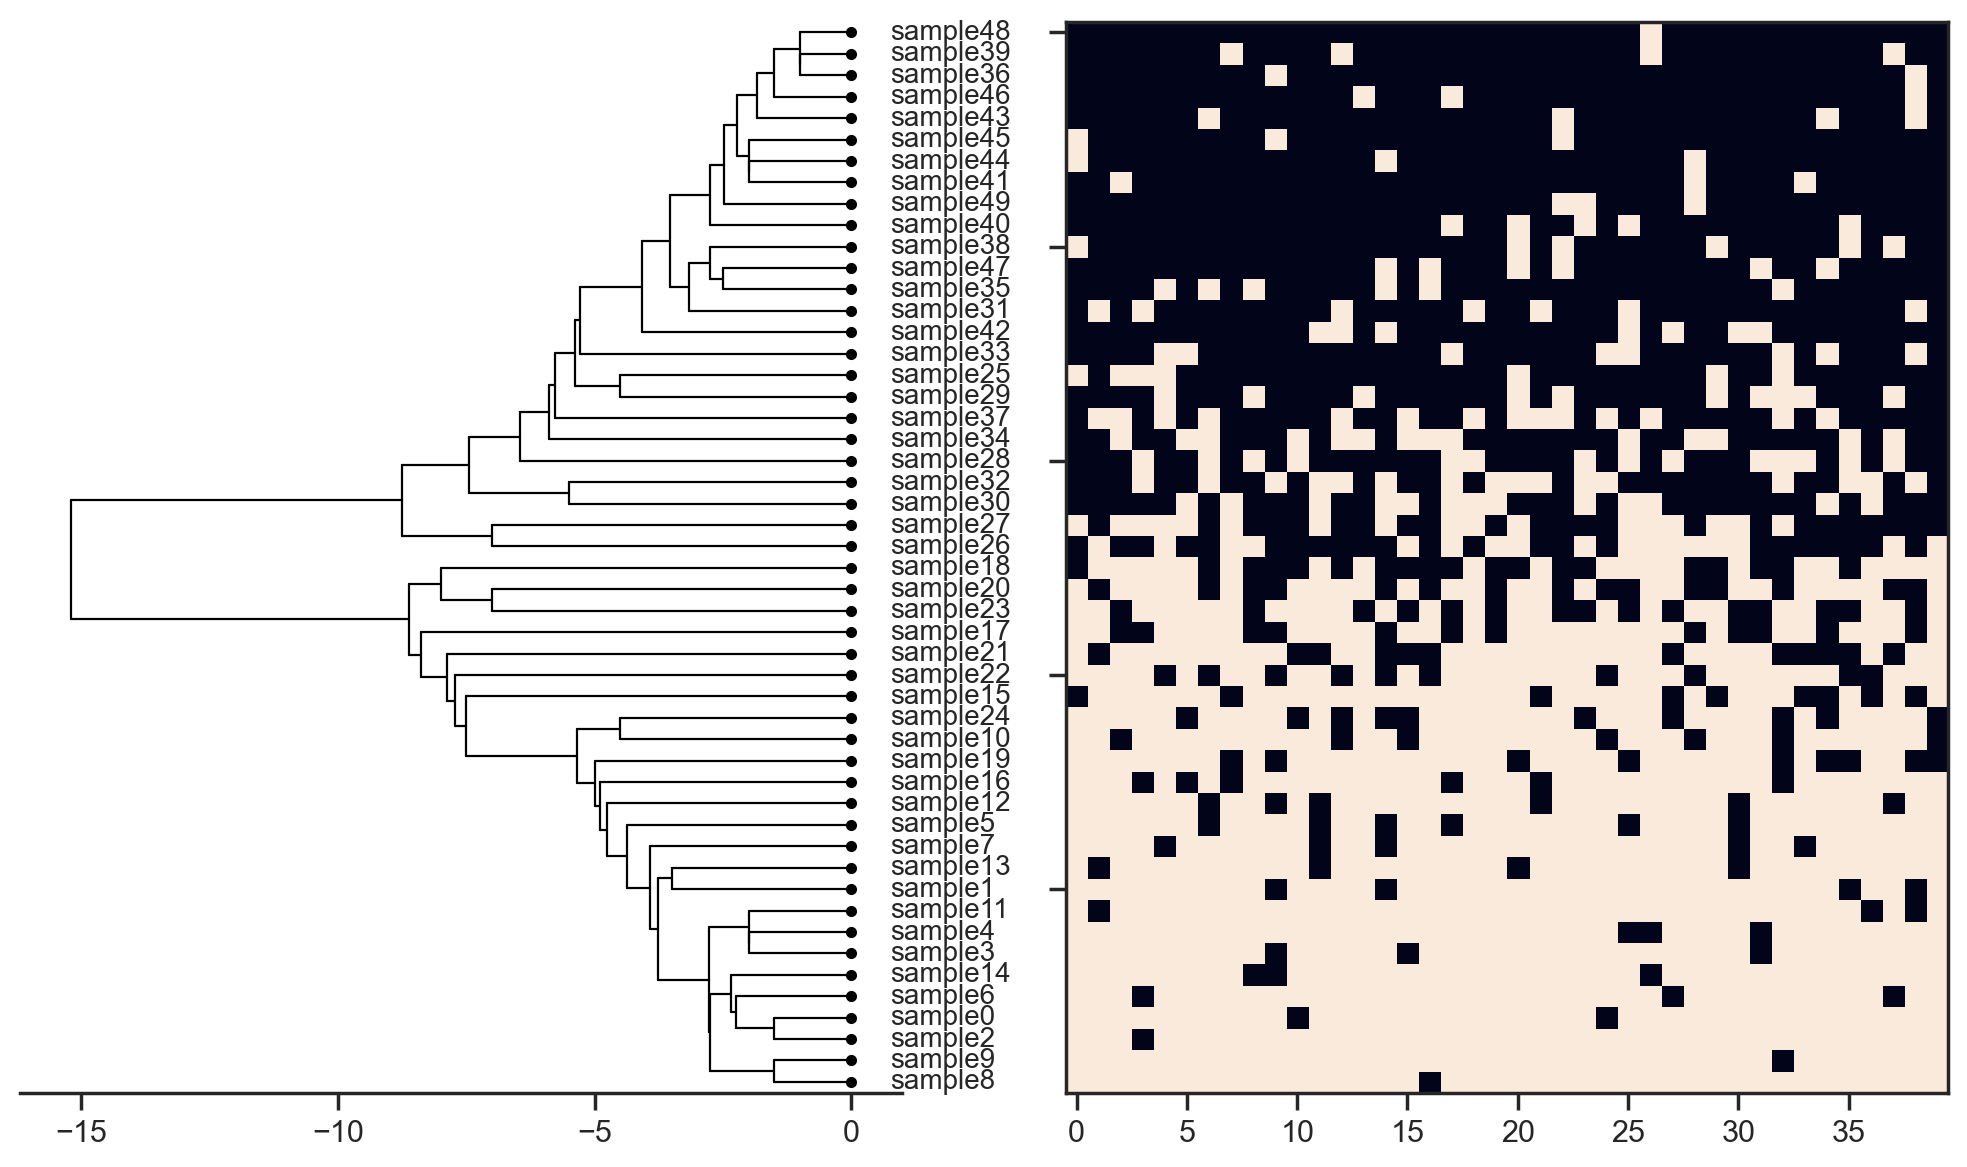

In [21]:
from ordering_haplotypes import tree_newick, order_tree, plot_tree
from ete3 import Tree
    
def proportion_same_ancestry(*args):
    a, b, case_sensitive = args
    "a and b are arrays or seris of posterior probabilities of minor parent ancestry"
    return np.absolute(a.round() - b.round()).sum()

newick_str = tree_newick(sample_name_list, seq_window_list, dist_fun=proportion_same_ancestry)
tree = Tree(newick_str)

def order_fun(c):
    leaf_names = [x.name for x in c.get_leaves()]
    idx = [sample_name_list.index(x) for x in leaf_names]
    return seq_window_list[idx].mean()

order_tree(tree, key=order_fun)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

leaf_info = plot_tree(tree, ax1, fontsize=10)
names, x, y = zip(*leaf_info)
idx = [sample_name_list.index(x) for x in names]

print("Index of sorted haplotypes:", idx)

sorted_seq_window_list = np.array([seq_window_list[i] for i in idx])
ax2.imshow(sorted_seq_window_list, aspect='auto') ;
ax2.invert_yaxis()
plt.tight_layout()

(array([77107.,   443.,   495.,   358.,   461.,  1952.,   417.,   404.,
          427., 12540.]),
 array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000., 200000.]),
 <BarContainer object of 10 artists>)

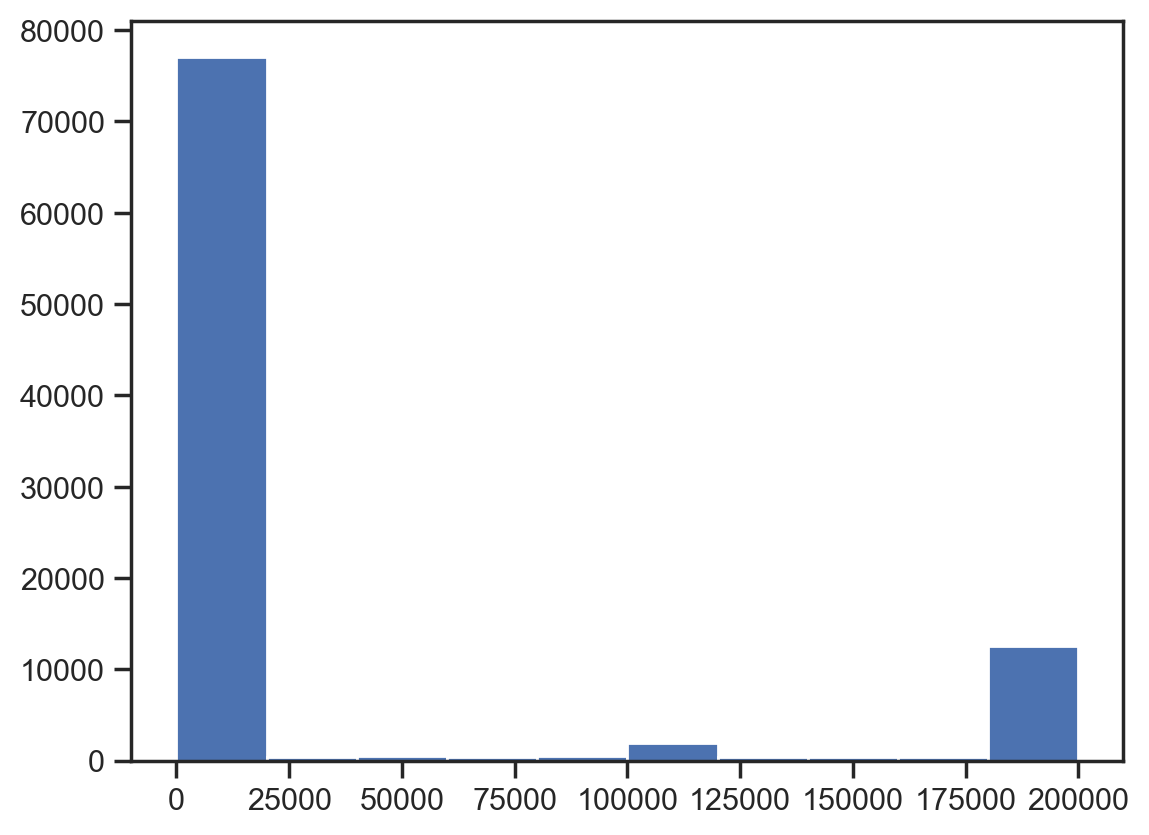

In [23]:
plt.hist(window_df.north)

In [26]:
window_df.head()

windows  Anubis, Tanzania  Hamadryas, Ethiopia  \
0  2500194          200000.0                  0.0   
1  2600194          200000.0                  0.0   
2  2700194          200000.0                  0.0   
3  2800194          200000.0                  0.0   
4  2900194          200000.0                  0.0   

   Cynocephalus, Central Tanzania  Papio, Senegal chrom individual  \
0                             0.0             0.0  chrX  Sci_30877   
1                             0.0             0.0  chrX  Sci_30877   
2                             0.0             0.0  chrX  Sci_30877   
3                             0.0             0.0  chrX  Sci_30877   
4                             0.0             0.0  chrX  Sci_30877   

            Origin  north  norm_north    start  is_north  is_south  
0  Aberdare, Kenya    0.0   -100000.0  2500194         0         0  
1  Aberdare, Kenya    0.0   -100000.0  2600194         0         0  
2  Aberdare, Kenya    0.0   -100000.0  2700194         0         0  
3  Aberdare, Kenya    0.0   -100000.0  2800194         0         0  
4  Aberdare, Kenya    0.0   -100000.0  2900194         0         0

In [33]:
window_df.start.unique()

array([  2500194,   2600194,   2700194, ..., 143400194, 143500194,
       143600194])

In [32]:
# df = pd.read_csv('chr20_test.txt')
df = window_df

df['haplo_ID'] = df.individual
df['pos'] = df.start
df['end_pos'] = df.start + 100000

df['chrom'] = 'chrX'
df['pop'] = df.haplo_ID
df['is_north'] = (df.north == 1).astype(int)
df['is_south'] = (df.north == -1).astype(int)
df = df.sort_values(['pop', 'chrom', 'start'])

haplo_ID_list = list(df.haplo_ID.unique())

north_south_segment_lists = []
for sample_name in haplo_ID_list:
    north_tuples = list(df.loc[(df.haplo_ID == sample_name) & (df.is_north == 1), ['pos', 'end_pos']].itertuples(index=False, name=None))
    south_tuples = list(df.loc[(df.haplo_ID == sample_name) & (df.is_north == 0), ['pos', 'end_pos']].itertuples(index=False, name=None))
    north_south_segment_lists.append((north_tuples, south_tuples))

def tot_overlap(arr1, arr2):
    """total overlap of two lists of intervals"""
    tot = 0
    i = j = 0
    n = len(arr1)
    m = len(arr2)
    while i < n and j < m:
        l = max(arr1[i][0], arr2[j][0])
        r = min(arr1[i][1], arr2[j][1])
        if l <= r: 
            tot += r - l
        if arr1[i][1] < arr2[j][1]:
            i += 1
        else:
            j += 1
    return tot

def proportion_same_ancestry(*args):
    """proportion of chromsome with same ancestry"""
    a, b, case_sensitive = args
    ovl = tot_overlap(a[0], b[0]) + tot_overlap(a[1], b[1])
    return 77000000 - ovl
    
newick_str = tree_newick(haplo_ID_list, north_south_segment_lists, dist_fun=proportion_same_ancestry)
tree = Tree(newick_str)

def order_fun(c):
    """order child clades so that leaves in left has more north ancestry"""
    leaf_names = [x.name for x in c.get_leaves()]
    idx = [haplo_ID_list.index(x) for x in leaf_names]
    return sum(e-s for i in idx for (s, e) in north_south_segment_lists[i][1]) - sum(e-s for i in idx for (s, e) in north_south_segment_lists[i][0])

order_tree(tree, key=order_fun)

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(5, 5))

leaf_info = plot_tree(tree, ax1, fontsize=2)
haplo_ID_sorting, x, y = zip(*leaf_info)

ValueError: Image size of -446151440x864 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 500x500 with 1 Axes>

/Users/kmt/miniconda3/envs/baboons/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/kmt/miniconda3/envs/baboons/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/kmt/miniconda3/envs/baboons/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


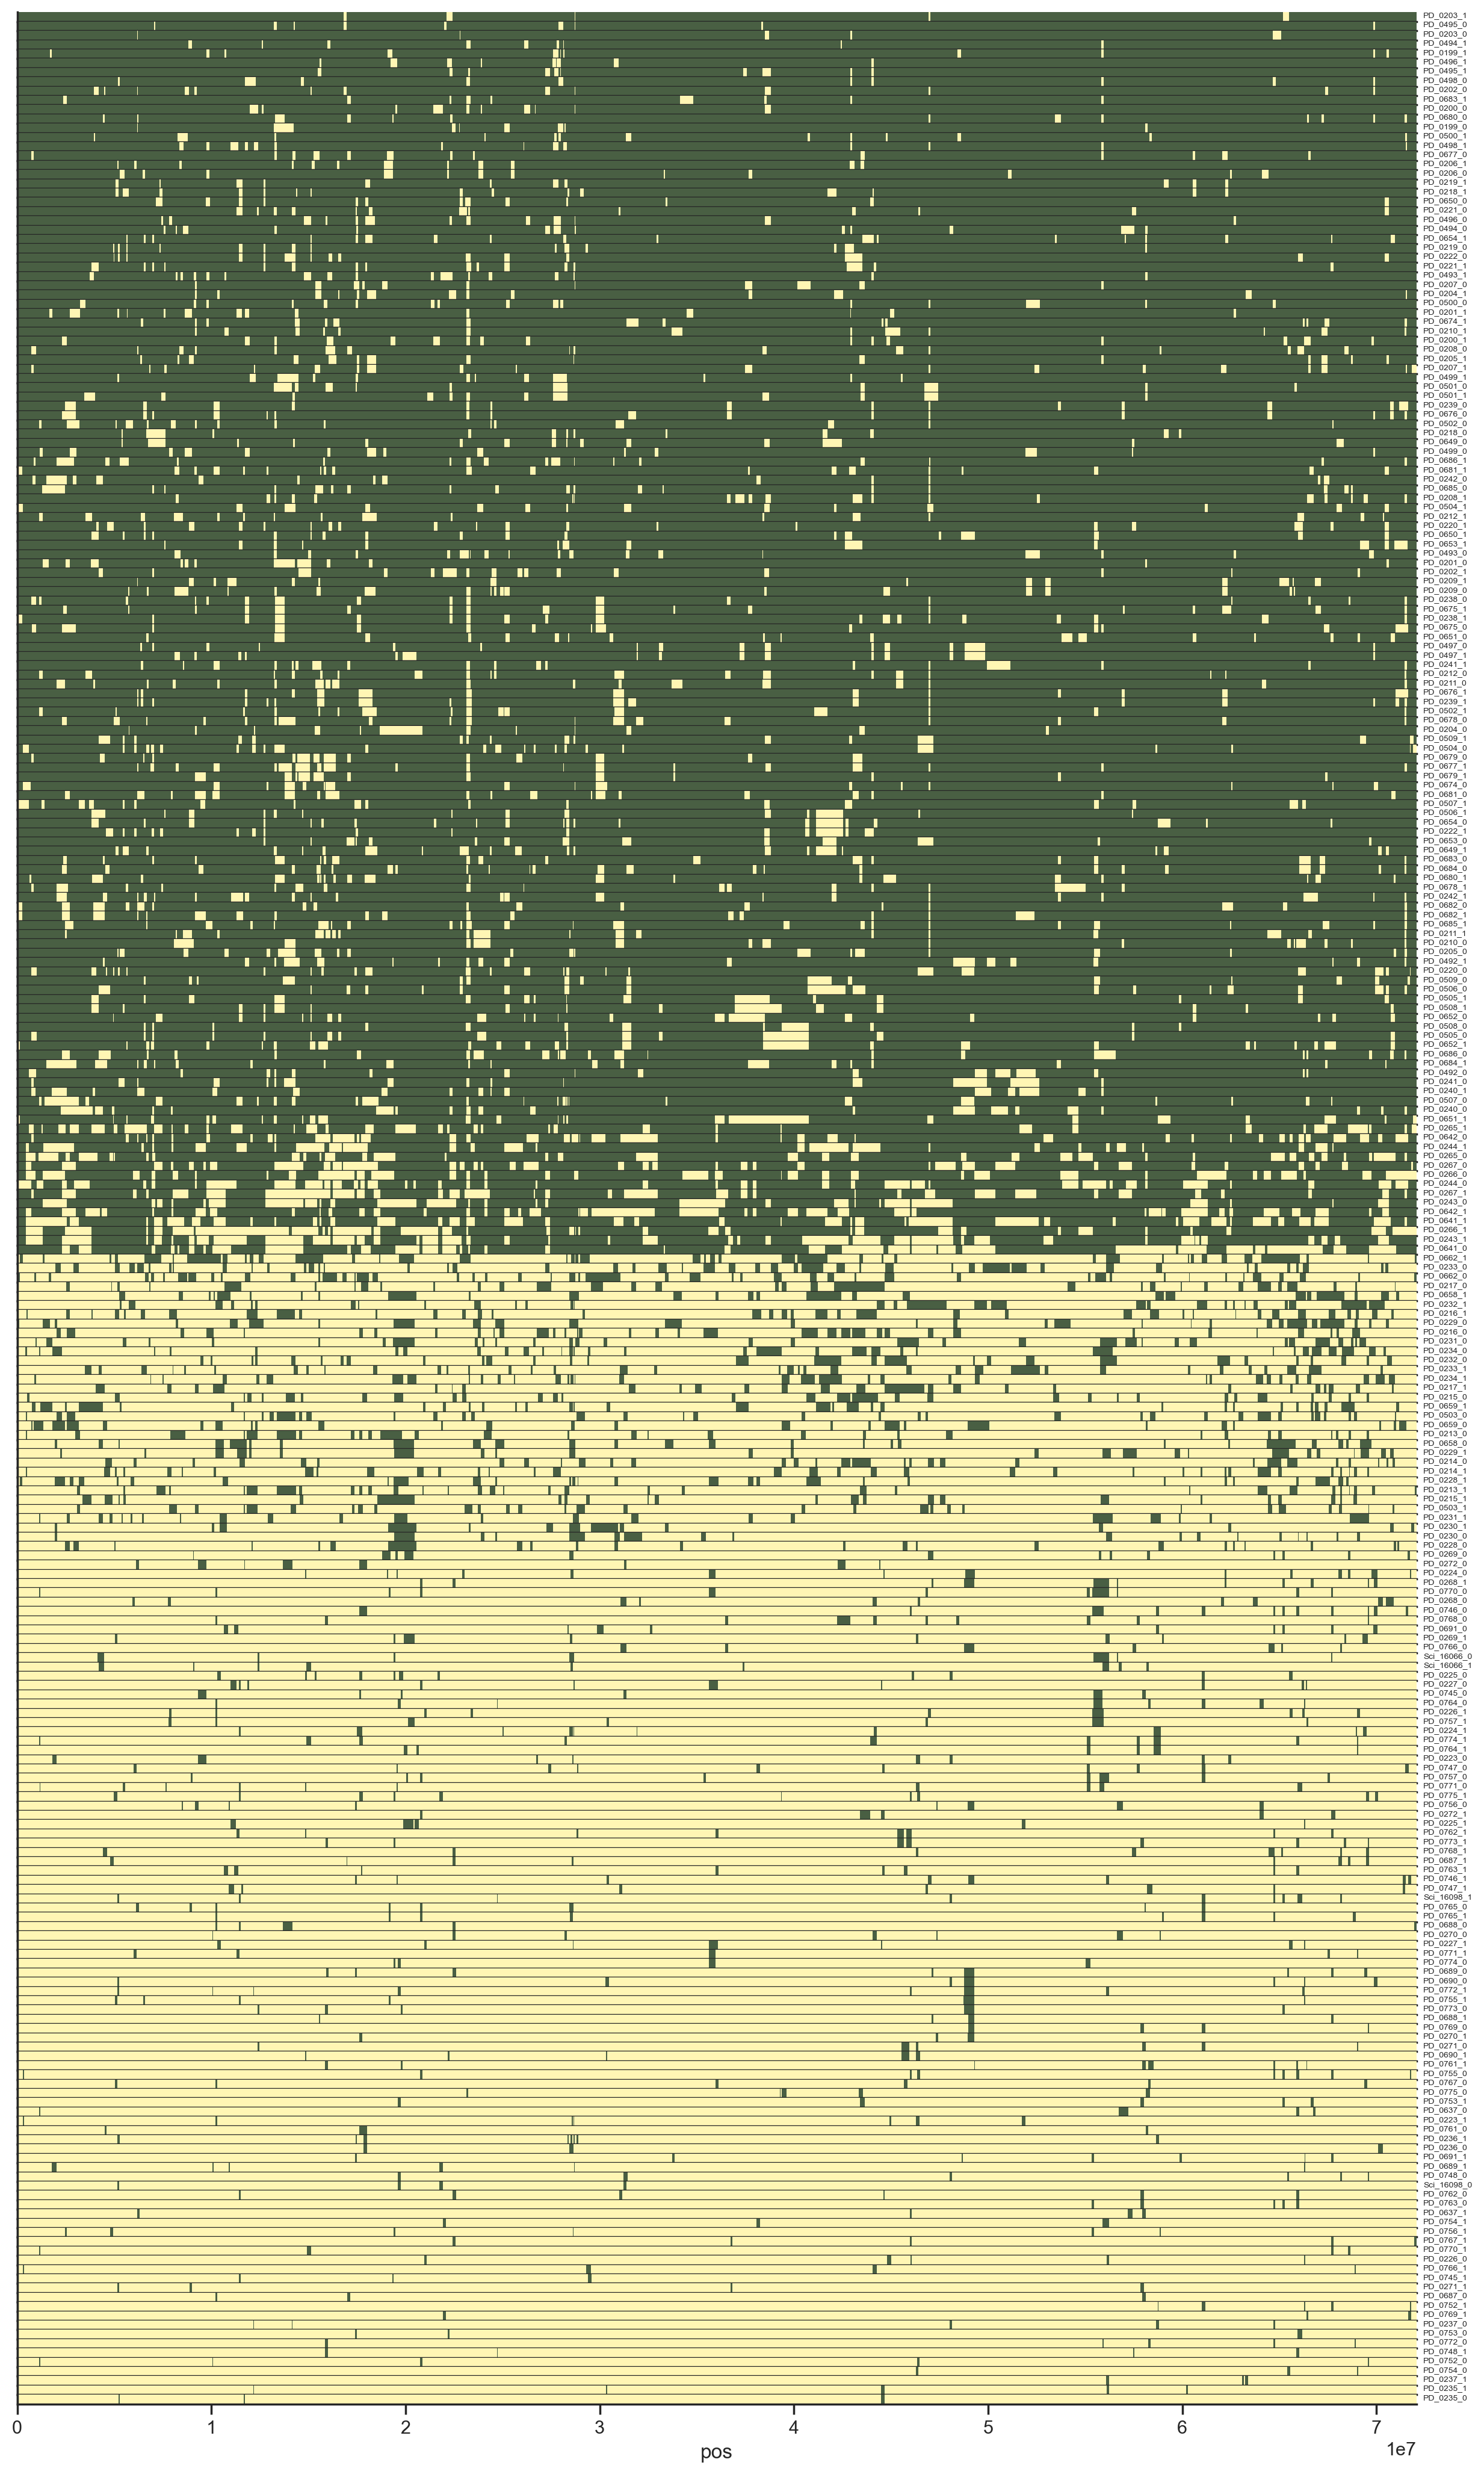

In [85]:
def stairs(df, start='pos', end='end_pos', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

g = sns.FacetGrid(stairs(df), col='chrom', row='haplo_ID', sharex=True, sharey=True, height=0.1, aspect=150,
                    row_order=haplo_ID_sorting, margin_titles=True, gridspec_kws={'hspace':0.0})
g.map(plt.fill_between, 
    'pos', 
    'is_north', 
    y2=0,
    color='#495F43',
    linewidth=0,
    capstyle='butt')
g.map(plt.fill_between, 
    'pos', 
    'is_south', 
    y2=0,
    color='#FFF6B4',
    linewidth=0,
    capstyle='butt')
g.set_titles(col_template="", row_template="")
g.set(yticklabels=[])  
g.set(ylabel=None)
g.tick_params(left=False)  # remove the ticks 
for label, ax in zip(hap_sorting, g.axes.flat):
    ax.set_xlim(plot_df.pos.min(), plot_df.pos.max())
    ax.set_ylim(0, 1)    
    ax.annotate(label, xy=(1.005 , 0.5), xycoords='axes fraction', ha='left', size=5)
    ax.set_xticks(np.arange(0, max(df.pos)+1, 10000000))